# Análise de diversidades por Universidade

## Imports e funções

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

sns.set_theme()
sns.set_style('whitegrid')

In [2]:
replace_map = {
    'TP_SITUACAO': {2: "Cursando",
                    3: "Matrícula trancada",
                    4: "Desvinculado do curso",
                    5: "Transferido para outro \n curso da mesma IES",
                    6: "Formado",
                    7: "Falecido"},
    'TP_SEXO' : {1: "Feminino", 2: "Masculino"}
}

colors = [(0.62, 0.0, 0.26), (0.89, 0.32, 0.29), (0.99, 0.65, 0.36), (1, 0.90, 0.44), (0.59, 0.73, 0.38), (0.64, 0.85, 0.64), (0.28, 0.63, 0.70), (0.37, 0.31, 0.64)]
cm = LinearSegmentedColormap.from_list('Spectral', colors)

def bar_plot_lines(dataframe, param1, param2, param3, param4, colormap=""):
    df = dataframe[[param1, param2]]

    data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
    data = data.replace(replace_map)

    if colormap != "":
    # colormap = plt.cm.nipy_spectral
    # colors = [colormap(i) for i in np.linspace(0, 1, len(df[param2].unique()))]
      data.replace(replace_map).groupby(param2)[param1].value_counts().sort_values().unstack(0) \
        .plot.bar(rot=0, figsize=(25, 10), colormap=colormap, fontsize=16, width=0.9, linestyle="--") \
        .legend(prop={'size': 20})
    else:
        data.replace(replace_map).groupby(param2)[param1].value_counts().sort_values().unstack(0) \
        .plot.bar(rot=0, figsize=(25, 10), fontsize=16, width=0.9, linestyle="--") \
        .legend(prop={'size': 20})
        
    plt.ylabel(param3, fontsize = 20)
    plt.xlabel(param4, fontsize = 20)

    xposition = [0.5 + i for i in range(len(df[param1].unique()))]
    for xc in xposition:
        plt.axvline(x=xc, color='gray', linestyle=':')
    
def bar_plot_lines_stacked_horizontal(dataframe, param1, param2, param3, param4, color_array=cm, colormap="", tick_amout=100, figure_size=(20, 30), sort_params=['Feminino', 'Masculino']):
    df = dataframe[[param1, param2]]

    data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
    data = data.replace(replace_map)

    data.groupby(param2)[param1].value_counts().unstack(0).sort_values(by=sort_params).plot.barh(rot=0, figsize=figure_size, fontsize=16, width=0.9, linestyle="--", stacked=True, xticks=[(i*1000) for i in range((tick_amout//1000) + 1)]).legend(prop={'size': 12})
    plt.ylabel(param3, fontsize = 16)
    plt.xlabel(param4, fontsize = 16)
    xposition = [10 + (i)*10 for i in range(tick_amout//10)]


def bar_plot_lines_horizontal(dataframe, param1, param2, param3, param4, color_array=cm, colormap="", tick_amout=100, figure_size=(20, 30)):
    df = dataframe[[param1, param2]]

    data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
    data = data.replace(replace_map)

    data.groupby(param2)[param1].value_counts().unstack(0)\
    .plot.barh(rot=0, figsize=figure_size, fontsize=16, width=0.9, linestyle="--", xticks=[(i*1000) for i in range((tick_amout//1000) + 1)]) \
    .legend(prop={'size': 12})
    plt.ylabel(param3, fontsize = 16)
    plt.xlabel(param4, fontsize = 16)
    xposition = [10 + (i)*10 for i in range(tick_amout//10)]

In [3]:
df = pd.read_csv('dataset/alunos_curso_2015_2019_tic_BA.csv')
df.head()

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,TP_NIVEL_ACADEMICO,...,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,IN_INGRESSO_PROCESSO_SELETIVO,NU_ANO_INGRESSO,CO_UF,NO_CURSO,SG_IES
0,2015,578,1.0,1.0,13277.0,NaN,4.0,1.0,1.0,1.0,...,NaN,1.0,0.0,0.0,0.0,NaN,2013.0,29,CIÊNCIA DA COMPUTAÇÃO,UFBA
1,2015,578,1.0,1.0,13277.0,NaN,4.0,1.0,1.0,1.0,...,NaN,1.0,0.0,0.0,0.0,NaN,2013.0,29,CIÊNCIA DA COMPUTAÇÃO,UFBA
2,2015,578,1.0,1.0,13277.0,NaN,4.0,1.0,1.0,1.0,...,NaN,1.0,0.0,0.0,0.0,NaN,2013.0,29,CIÊNCIA DA COMPUTAÇÃO,UFBA
3,2015,578,1.0,1.0,13277.0,NaN,4.0,1.0,1.0,1.0,...,NaN,1.0,0.0,0.0,0.0,NaN,2013.0,29,CIÊNCIA DA COMPUTAÇÃO,UFBA
4,2015,578,1.0,1.0,13277.0,NaN,4.0,1.0,1.0,1.0,...,NaN,1.0,0.0,0.0,0.0,NaN,2013.0,29,CIÊNCIA DA COMPUTAÇÃO,UFBA


In [8]:
df.groupby(['CO_IES', 'SG_IES']).size()

CO_IES  SG_IES
24      UESC       972
40      UNEB      1466
578     UFBA      3386
666     UEFS      1952
688     UESB      1143
dtype: int64

In [9]:
df.IN_DEFICIENCIA_SURDOCEGUEIRA.unique()

array([nan,  0.])

In [10]:
replace_map = {
    'TP_COR_RACA':{
        0: 'Não quis declarar',  
        1: 'Branca',
        2: 'Preta',
        3: 'Parda',
        4: 'Amarela',
        5: 'Indígena',
        9: 'Sem informação'
    }
}

In [11]:
df.replace(replace_map, inplace=True)

## Preparando dados de forma de ingresso e reserva

In [12]:

# colunas = ['IN_DEFICIENCIA_AUDITIVA',
# 'IN_DEFICIENCIA_FISICA',
# 'IN_DEFICIENCIA_INTELECTUAL',
# 'IN_DEFICIENCIA_MULTIPLA',
# 'IN_DEFICIENCIA_SURDEZ',
# 'IN_DEFICIENCIA_SURDOCEGUEIRA',
# 'IN_DEFICIENCIA_BAIXA_VISAO',
# 'IN_DEFICIENCIA_CEGUEIRA',
# 'IN_DEFICIENCIA_SUPERDOTACAO',
# 'IN_TGD_AUTISMO',
# 'IN_TGD_SINDROME_ASPERGER',
# 'IN_TGD_SINDROME_RETT',
# 'IN_TGD_TRANSTOR_DESINTEGRATIVO']
# colunas = ['IN_DEFICIENCIA_AUDITIVA', 'IN_DEFICIENCIA_FISICA', 
#  'IN_DEFICIENCIA_INTELECTUAL', 'IN_TGD_SINDROME_ASPERGER']
# colunas = ['IN_RESERVA_ETNICO', 'IN_RESERVA_DEFICIENCIA', 
#  'IN_RESERVA_ENSINO_PUBLICO', 'IN_RESERVA_RENDA_FAMILIAR',
#  'IN_RESERVA_OUTRA']
colunas = ['IN_INGRESSO_AVALIACAO_SERIADA','IN_INGRESSO_ENEM', 'IN_INGRESSO_VESTIBULAR', 
   'IN_INGRESSO_SELECAO_SIMPLIFICA', 'IN_INGRESSO_OUTRO_TIPO_SELECAO', 'IN_INGRESSO_VAGA_REMANESC',
   'IN_INGRESSO_VAGA_PROG_ESPECIAL', 'IN_INGRESSO_TRANSF_EXOFFICIO', 'IN_INGRESSO_DECISAO_JUDICIAL',
   'IN_INGRESSO_CONVENIO_PECG', 'IN_INGRESSO_EGRESSO', 'IN_INGRESSO_OUTRA_FORMA']
universidades, anos, categoria, valor, qt_abs, media = [], [], [], [], [], []
for uni in df.SG_IES.unique():
    for ano in range(2015, 2020):
        df_uni = df.loc[(df.SG_IES == uni) & (df.NU_ANO_CENSO == ano)]
        for i in range(len(colunas)):
            anos.append(ano)
            universidades.append(uni)
            df_uni_cat = df_uni.loc[df_uni[colunas[i]] == 1]
            valor.append(colunas[i])
            categoria.append('forma_ingresso')
            valor_abs = df_uni_cat.groupby([colunas[i]]).size().values.tolist()
            if len(valor_abs) > 0:
                qt_abs.append(sum(valor_abs))
                total = df_uni.groupby(['NU_ANO_CENSO']).size().values.tolist()
                media.append((100*sum(valor_abs)/sum(total)))
            else:
                qt_abs.append(0)
                media.append(0)
            
            # for j in range(len(valores[i])):
            #     if colunas[i] == 'NU_IDADE':
            #         if j-1 == -1:
            #             valor.append(f'até {valores[i][j]} anos')
            #             print(0,valores[i][j] )
            #             df_uni_cat = df_uni.loc[(df_uni[colunas[i]] >= 0) & (df_uni[colunas[i]] < valores[i][j])]
            #             print(df_uni_cat.groupby([colunas[i]]).size().values)
            #         else:
            #             print(valores[i][j-1],valores[i][j] )
            #             valor.append(f'{valores[i][j-1]} - {valores[i][j]-1} anos')
            #             df_uni_cat = df_uni.loc[(df_uni[colunas[i]] >= valores[i][j-1]) & (df_uni[colunas[i]] < valores[i][j])]
            #             print(df_uni_cat.groupby([colunas[i]]).size().values)
            #     else:
            #         valor.append(valores[i][j])
            #         df_uni_cat = df_uni.loc[df_uni[colunas[i]] == valores[i][j]]
            #         print('---- não é idade -----')
            #         print(df_uni_cat.groupby([colunas[i]]).size().values)
                    
            #     valor_abs = df_uni_cat.groupby([colunas[i]]).size().values.tolist()
                
            #     universidades.append(uni)
            #     anos.append(ano)
            #     categoria.append(colunas[i])
                
            #     if len(valor_abs) > 0:
            #         qt_abs.append(sum(valor_abs))
                
            #         total = df_uni.groupby(['NU_ANO_CENSO']).size().values.tolist()
            #         # print(total)    
            #         print(valor_abs, sum(valor_abs))
            #         media.append((100*sum(valor_abs)/sum(total)))
            #     else:
            #         qt_abs.append(0)
            #         media.append(0)
                    
df_forma_ingresso = pd.DataFrame({'universidade':universidades, 'ano':anos, 
                                 'categoria':categoria, 'valor': valor,
                                 'qt_abs':qt_abs, 'media':media})
df_forma_ingresso.sample(10)

,universidade,ano,categoria,valor,qt_abs,media
287,UESB,2018,forma_ingresso,IN_INGRESSO_OUTRA_FORMA,0,0.000000
183,UEFS,2015,forma_ingresso,IN_INGRESSO_SELECAO_SIMPLIFICA,2,0.529101
73,UESC,2016,forma_ingresso,IN_INGRESSO_ENEM,141,76.630435
328,UNEB,2017,forma_ingresso,IN_INGRESSO_OUTRO_TIPO_SELECAO,0,0.000000
266,UESB,2017,forma_ingresso,IN_INGRESSO_VESTIBULAR,125,57.870370
26,UFBA,2017,forma_ingresso,IN_INGRESSO_VESTIBULAR,228,33.928571
296,UESB,2019,forma_ingresso,IN_INGRESSO_DECISAO_JUDICIAL,0,0.000000
230,UEFS,2019,forma_ingresso,IN_INGRESSO_VESTIBULAR,392,96.314496
125,NaN,2015,forma_ingresso,IN_INGRESSO_VAGA_REMANESC,0,0.000000
60,UESC,2015,forma_ingresso,IN_INGRESSO_AVALIACAO_SERIADA,0,0.000000


In [13]:
pd.set_option('display.max_rows', None)
df_forma_ingresso

,universidade,ano,categoria,valor,qt_abs,media
0,UFBA,2015,forma_ingresso,IN_INGRESSO_AVALIACAO_SERIADA,0,0.000000
1,UFBA,2015,forma_ingresso,IN_INGRESSO_ENEM,270,46.793761
2,UFBA,2015,forma_ingresso,IN_INGRESSO_VESTIBULAR,334,57.885615
3,UFBA,2015,forma_ingresso,IN_INGRESSO_SELECAO_SIMPLIFICA,7,1.213172
4,UFBA,2015,forma_ingresso,IN_INGRESSO_OUTRO_TIPO_SELECAO,0,0.000000
5,UFBA,2015,forma_ingresso,IN_INGRESSO_VAGA_REMANESC,53,9.185442
6,UFBA,2015,forma_ingresso,IN_INGRESSO_VAGA_PROG_ESPECIAL,0,0.000000
7,UFBA,2015,forma_ingresso,IN_INGRESSO_TRANSF_EXOFFICIO,1,0.173310
8,UFBA,2015,forma_ingresso,IN_INGRESSO_DECISAO_JUDICIAL,0,0.000000
9,UFBA,2015,forma_ingresso,IN_INGRESSO_CONVENIO_PECG,1,0.173310


In [14]:
df_reserva_vagas.loc[df_reserva_vagas.valor == 'IN_RESERVA_DEFICIENCIA']

NameError: name 'df_reserva_vagas' is not defined

In [15]:
df_ingresso = df[['IN_INGRESSO_VESTIBULAR', 'IN_INGRESSO_ENEM', 'IN_INGRESSO_AVALIACAO_SERIADA', 
   'IN_INGRESSO_SELECAO_SIMPLIFICA', 'IN_INGRESSO_OUTRO_TIPO_SELECAO', 'IN_INGRESSO_VAGA_REMANESC',
   'IN_INGRESSO_VAGA_PROG_ESPECIAL', 'IN_INGRESSO_TRANSF_EXOFFICIO', 'IN_INGRESSO_DECISAO_JUDICIAL',
   'IN_INGRESSO_CONVENIO_PECG', 'IN_INGRESSO_EGRESSO', 'IN_INGRESSO_OUTRA_FORMA']]
df_ingresso = df_ingresso.fillna(0)

In [16]:
df.loc[(df.IN_INGRESSO_VESTIBULAR == 1) & (df.IN_INGRESSO_ENEM == 1)].values

array([[2015, 578, 1.0, ..., 29, 'CIÊNCIA DA COMPUTAÇÃO', 'UFBA'],
       [2015, 578, 1.0, ..., 29, 'CIÊNCIA DA COMPUTAÇÃO', 'UFBA'],
       [2015, 578, 1.0, ..., 29, 'CIÊNCIA DA COMPUTAÇÃO', 'UFBA'],
       ...,
       [2019, 578, 1.0, ..., 29, 'SISTEMAS DE INFORMAÇÃO', 'UFBA'],
       [2019, 578, 1.0, ..., 29, 'SISTEMAS DE INFORMAÇÃO', 'UFBA'],
       [2019, 578, 1.0, ..., 29, 'SISTEMAS DE INFORMAÇÃO', 'UFBA']],
      dtype=object)

In [17]:
df_reserva = df[['IN_RESERVA_ETNICO', 'IN_RESERVA_DEFICIENCIA', 
 'IN_RESERVA_ENSINO_PUBLICO', 'IN_RESERVA_RENDA_FAMILIAR',
 'IN_RESERVA_OUTRA']]

In [18]:
for row in df[['IN_INGRESSO_VESTIBULAR', 'IN_INGRESSO_ENEM', 'IN_INGRESSO_AVALIACAO_SERIADA', 
   'IN_INGRESSO_SELECAO_SIMPLIFICA', 'IN_INGRESSO_OUTRO_TIPO_SELECAO', 'IN_INGRESSO_VAGA_REMANESC',
   'IN_INGRESSO_VAGA_PROG_ESPECIAL', 'IN_INGRESSO_TRANSF_EXOFFICIO', 'IN_INGRESSO_DECISAO_JUDICIAL',
   'IN_INGRESSO_CONVENIO_PECG', 'IN_INGRESSO_EGRESSO', 'IN_INGRESSO_OUTRA_FORMA']].values:
    if sum(row) != 1:
        print(sum(row), row)

nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  0.  0.  0. nan  1.  0.  0.  0. nan nan nan]
nan [ 0.  0.  0.  0. nan  1.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.

nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  0.  0.  0. nan  1.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.

nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  0.  0.  1. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  1.  0.  0. nan  0.

nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.

nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.

nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  1.  0.  0. nan  0.

nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.

nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.

nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.

nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.

nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.

nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  0.  0.  0. nan  1.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  0.  0.  0. nan  1.  0.  0.  0.  0.  0. nan]
nan [ 0.  0.  0.  1. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  0.  0.  0. nan  1.  0.  0.  0.  0.  0. nan]
nan [ 0.  0.  0.  0. nan  1.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  0.  0.  0. nan  1.  0.  0.  0.  0.  0. nan]
nan [ 0.  0.  0.  1. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  0.  0.  0. nan  1.  0.  0.  0.  0.  0. nan]
nan [ 0.  0.  0.  0. nan  1.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.

nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  0.  0.  0. nan  1.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 1.  0.  0.  0. nan  0.

nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  0.  0.  0. nan  1.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.  0.  0.  0.  0.  0. nan]
nan [ 0.  1.  0.  0. nan  0.

In [19]:
df.IN_INGRESSO_VESTIBULAR

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       1.0
18       1.0
19       1.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
30       0.0
31       0.0
32       0.0
33       0.0
34       0.0
35       0.0
36       0.0
37       0.0
38       0.0
39       0.0
40       0.0
41       0.0
42       0.0
43       0.0
44       0.0
45       0.0
46       0.0
47       0.0
48       1.0
49       0.0
50       1.0
51       0.0
52       1.0
53       0.0
54       1.0
55       1.0
56       1.0
57       0.0
58       0.0
59       1.0
60       1.0
61       1.0
62       1.0
63       1.0
64       1.0
65       1.0
66       1.0
67       1.0
68       1.0
69       1.0
70       1.0
71       1.0
72       1.0
73       1.0
74       1.0
75       1.0
76       1.0

## Preparando base

In [20]:
colunas = ['TP_SEXO', 'IN_DEFICIENCIA', 'TP_COR_RACA', 'NU_IDADE']
valores = [[1, 2], 
           [0, 1],
           ['Não quis declarar', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Sem informação'],
           [18, 25, 35, 45, 60, 100]]

universidades, anos, categoria, valor, qt_abs, media = [], [], [], [], [], []
for uni in df.SG_IES.unique():
    for ano in range(2015, 2020):
        df_uni = df.loc[(df.SG_IES == uni) & (df.NU_ANO_CENSO == ano)]
        for i in range(len(colunas)):
            for j in range(len(valores[i])):
                if colunas[i] == 'NU_IDADE':
                    if j-1 == -1:
                        valor.append(f'até {valores[i][j]} anos')
                        print(0,valores[i][j] )
                        df_uni_cat = df_uni.loc[(df_uni[colunas[i]] >= 0) & (df_uni[colunas[i]] < valores[i][j])]
                        print(df_uni_cat.groupby([colunas[i]]).size().values)
                    else:
                        print(valores[i][j-1],valores[i][j] )
                        valor.append(f'{valores[i][j-1]} - {valores[i][j]-1} anos')
                        df_uni_cat = df_uni.loc[(df_uni[colunas[i]] >= valores[i][j-1]) & (df_uni[colunas[i]] < valores[i][j])]
                        print(df_uni_cat.groupby([colunas[i]]).size().values)
                else:
                    valor.append(valores[i][j])
                    df_uni_cat = df_uni.loc[df_uni[colunas[i]] == valores[i][j]]
                    print('---- não é idade -----')
                    print(df_uni_cat.groupby([colunas[i]]).size().values)
                    
                valor_abs = df_uni_cat.groupby([colunas[i]]).size().values.tolist()
                
                universidades.append(uni)
                anos.append(ano)
                categoria.append(colunas[i])
                
                if len(valor_abs) > 0:
                    qt_abs.append(sum(valor_abs))
                    # if colunas[i] == 'NU_IDADE':
                    #     if j-1 == -1:
                    #         total = df.loc[(df.SG_IES == uni) &
                    #                    (df.NU_ANO_CENSO == ano)] \
                    #             .groupby(['NU_ANO_CENSO']).size().values.tolist()
                    #         # total = df.loc[(df.SG_IES == uni) &
                    #         # (df[colunas[i]] >= 0) & 
                    #         # (df[colunas[i]] < valores[i][j])] \
                    #         #     .groupby(['NU_ANO_CENSO']).size().values.tolist()
                    #     else:
                    #         # total = df.loc[(df.SG_IES == uni) &
                    #         #     (df[colunas[i]] >= valores[i][j-1]) & 
                    #         #     (df[colunas[i]] < valores[i][j])] \
                    #         #         .groupby(['NU_ANO_CENSO']).size().values.tolist()
                    #         total = df.loc[(df.SG_IES == uni) &
                    #                    (df.NU_ANO_CENSO == ano)] \
                    #             .groupby(['NU_ANO_CENSO']).size().values.tolist()
                    # else:
                    #     # total = df.loc[(df.SG_IES == uni) &
                    #     #         (df[colunas[i]] == valores[i][j])] \
                    #     #             .groupby(['NU_ANO_CENSO']).size().values.tolist()
                    #     total = df.loc[(df.SG_IES == uni) &
                    #                    (df.NU_ANO_CENSO == ano)] \
                    #             .groupby(['NU_ANO_CENSO']).size().values.tolist()
                
                    total = df_uni.groupby(['NU_ANO_CENSO']).size().values.tolist()
                    # print(total)    
                    print(valor_abs, sum(valor_abs))
                    media.append((100*sum(valor_abs)/sum(total)))
                else:
                    qt_abs.append(0)
                    media.append(0)
                    
                    
                    # print(valor_abs)
        
    # print(df_uni_sexo)
    
df_universidades = pd.DataFrame({'universidade':universidades, 'ano':anos, 
                                 'categoria':categoria, 'valor': valor,
                                 'qt_abs':qt_abs, 'media':media})
df_universidades.sample(10)

---- não é idade -----
[85]
[85] 85
---- não é idade -----
[492]
[492] 492
---- não é idade -----
[571]
[571] 571
---- não é idade -----
[6]
[6] 6
---- não é idade -----
[371]
[371] 371
---- não é idade -----
[15]
[15] 15
---- não é idade -----
[28]
[28] 28
---- não é idade -----
[160]
[160] 160
---- não é idade -----
[3]
[3] 3
---- não é idade -----
[]
---- não é idade -----
[]
0 18
[]
18 25
[26 43 57 69 77 57 52]
[26, 43, 57, 69, 77, 57, 52] 381
25 35
[52 38 16 20 16 10  7  3  4  5]
[52, 38, 16, 20, 16, 10, 7, 3, 4, 5] 171
35 45
[5 4 1 2 2 1 2 1]
[5, 4, 1, 2, 2, 1, 2, 1] 18
45 60
[2 1 2 1]
[2, 1, 2, 1] 6
60 100
[1]
[1] 1
---- não é idade -----
[102]
[102] 102
---- não é idade -----
[573]
[573] 573
---- não é idade -----
[657]
[657] 657
---- não é idade -----
[5]
[5] 5
---- não é idade -----
[406]
[406] 406
---- não é idade -----
[23]
[23] 23
---- não é idade -----
[43]
[43] 43
---- não é idade -----
[197]
[197] 197
---- não é idade -----
[3]
[3] 3
---- não é idade -----
[3]
[3] 3
---

[366] 366
---- não é idade -----
[3]
[3] 3
---- não é idade -----
[7]
[7] 7
---- não é idade -----
[21]
[21] 21
---- não é idade -----
[]
---- não é idade -----
[2]
[2] 2
---- não é idade -----
[]
0 18
[1 8]
[1, 8] 9
18 25
[27 40 49 50 39 58 33]
[27, 40, 49, 50, 39, 58, 33] 296
25 35
[24 24 11  9  9  3  5  1  3]
[24, 24, 11, 9, 9, 3, 5, 1, 3] 89
35 45
[1 1 1 2]
[1, 1, 1, 2] 5
45 60
[]
60 100
[]
---- não é idade -----
[37]
[37] 37
---- não é idade -----
[357]
[357] 357
---- não é idade -----
[394]
[394] 394
---- não é idade -----
[]
---- não é idade -----
[354]
[354] 354
---- não é idade -----
[4]
[4] 4
---- não é idade -----
[11]
[11] 11
---- não é idade -----
[23]
[23] 23
---- não é idade -----
[]
---- não é idade -----
[2]
[2] 2
---- não é idade -----
[]
0 18
[14]
[14] 14
18 25
[40 39 41 45 46 31 46]
[40, 39, 41, 45, 46, 31, 46] 288
25 35
[20 18 21 10  5  6  2  3  1  3]
[20, 18, 21, 10, 5, 6, 2, 3, 1, 3] 89
35 45
[1 2]
[1, 2] 3
45 60
[]
60 100
[]
---- não é idade -----
[45]
[45] 45
-

,universidade,ano,categoria,valor,qt_abs,media
504,UNEB,2019,NU_IDADE,até 18 anos,0,0.000000
134,UESC,2017,NU_IDADE,45 - 59 anos,0,0.000000
184,NaN,2015,NU_IDADE,35 - 44 anos,0,0.000000
229,NaN,2018,TP_COR_RACA,Amarela,0,0.000000
331,UEFS,2019,TP_COR_RACA,Amarela,0,0.000000
311,UEFS,2018,TP_COR_RACA,Branca,4,1.015228
424,UESB,2019,NU_IDADE,60 - 99 anos,0,0.000000
432,UNEB,2015,TP_COR_RACA,Parda,69,26.335878
218,NaN,2017,NU_IDADE,35 - 44 anos,0,0.000000
56,UFBA,2018,TP_COR_RACA,Branca,45,6.401138


In [21]:
df_universidades

,universidade,ano,categoria,valor,qt_abs,media
0,UFBA,2015,TP_SEXO,1,85,14.731369
1,UFBA,2015,TP_SEXO,2,492,85.268631
2,UFBA,2015,IN_DEFICIENCIA,0,571,98.960139
3,UFBA,2015,IN_DEFICIENCIA,1,6,1.039861
4,UFBA,2015,TP_COR_RACA,Não quis declarar,371,64.298094
5,UFBA,2015,TP_COR_RACA,Branca,15,2.599653
6,UFBA,2015,TP_COR_RACA,Preta,28,4.852686
7,UFBA,2015,TP_COR_RACA,Parda,160,27.729636
8,UFBA,2015,TP_COR_RACA,Amarela,3,0.519931
9,UFBA,2015,TP_COR_RACA,Indígena,0,0.000000


In [22]:
df_universidades.to_csv('dataset/df_universidades_ba_tp_sexo.csv', index=False)

## Gráficos de Sexo

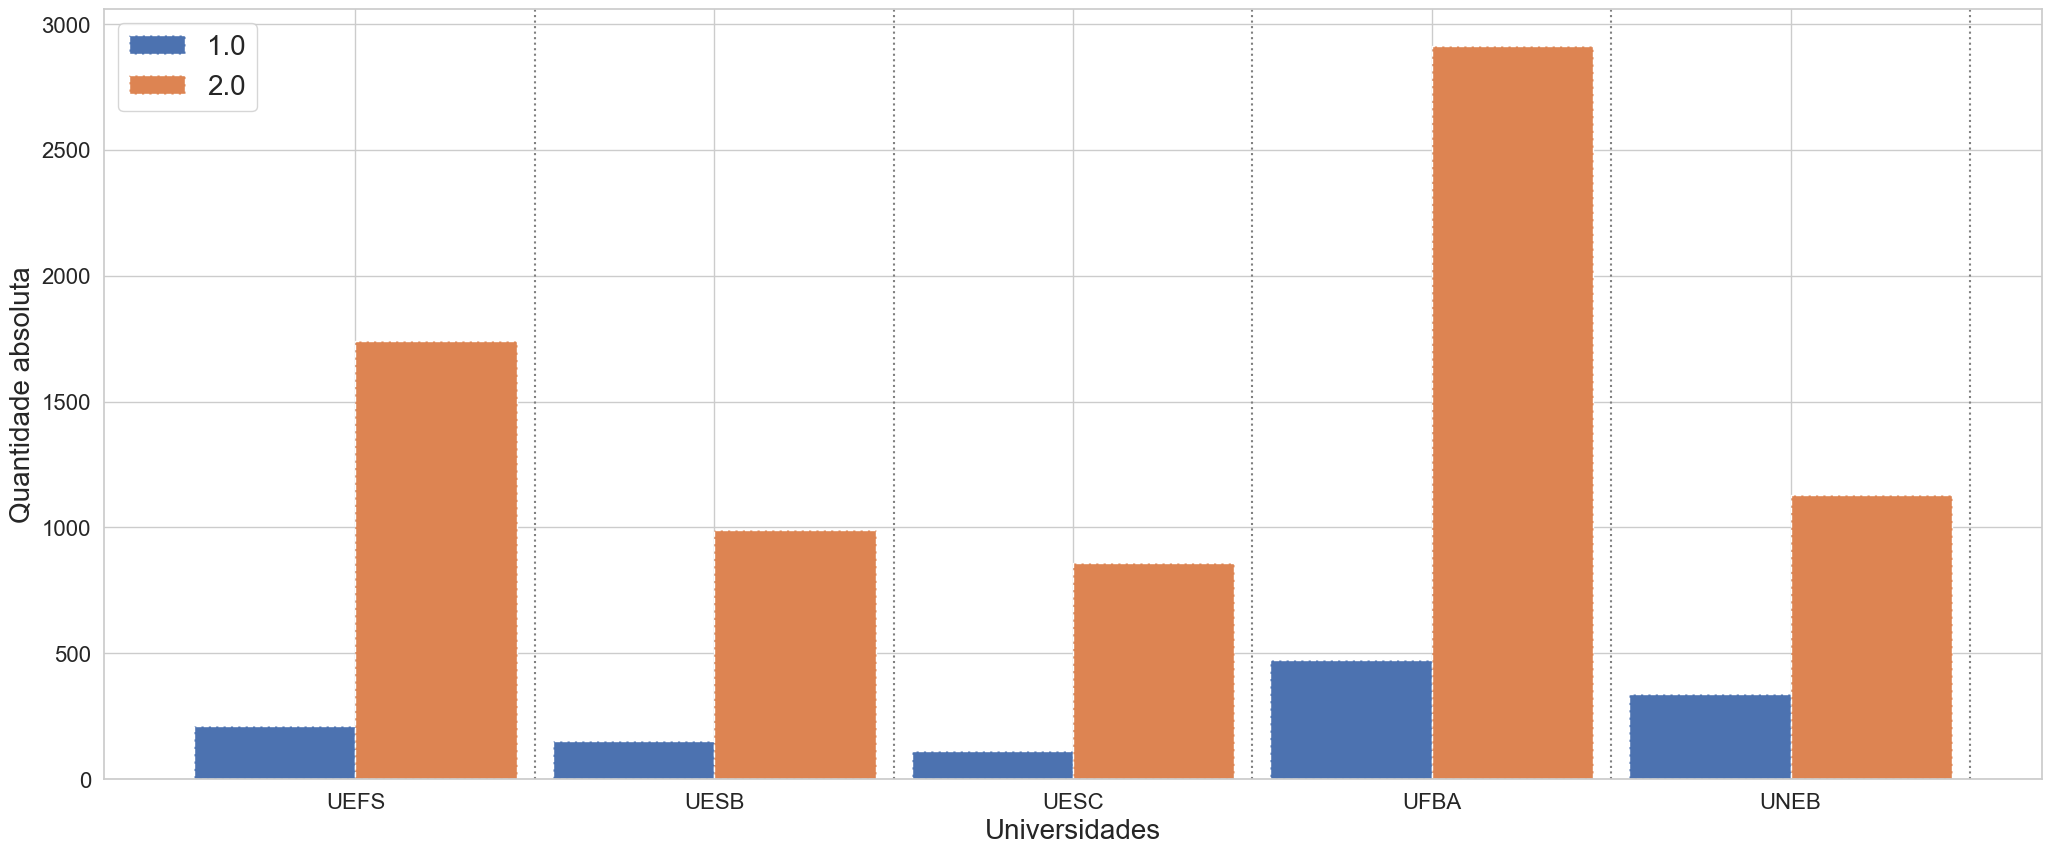

In [23]:
bar_plot_lines(df, 'SG_IES', 'TP_SEXO', 'Quantidade absoluta', 'Universidades')

como é calculada a média: pega o número de mulheres de 2019 da UFSC e divide pela soma de mulheres da UFSC de 2015 a 2019

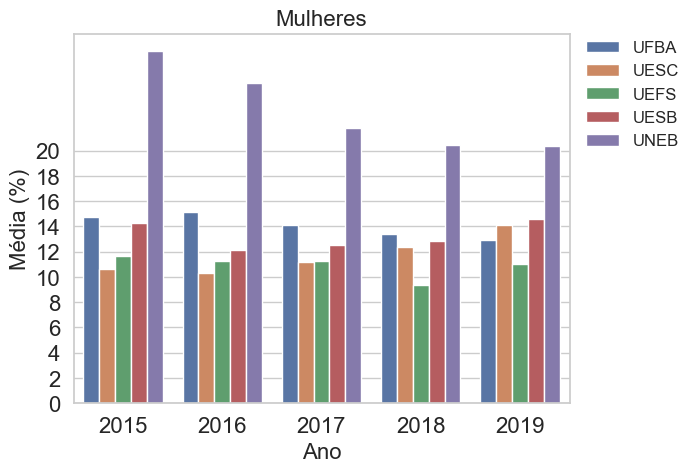

<Figure size 3000x2000 with 0 Axes>

In [24]:
sns.set_theme()
sns.set_style('whitegrid')
df_universidades_sexo = df_universidades.loc[df_universidades.categoria == 'TP_SEXO']
ax = sns.barplot(
    data=df_universidades_sexo.loc[df_universidades_sexo.valor == 1],
    y="media", hue="universidade", x='ano'
)
plt.figure(figsize=(30, 20))
ax.set_title('Mulheres', fontsize=16)
# ax.legend(frameon=False, prop={'size':12})
ax.set_ylabel('Média (%)', fontsize=16)
ax.set_xlabel('Ano', fontsize=16)
ax.set_yticks([x for x in range(0, 21, 2)])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,frameon=False,prop={'size':12})
# sns.barplot(
#     data=df_universidades_sexo.loc[df_universidades_sexo.valor == 2],
#     y="media", hue="universidade", x='ano', ax=ax[1]
# )
# ax[1].set_ylabel('')
# ax[1].set_xlabel('Ano', fontsize=16)
# ax[1].set_title('Homens', fontsize=16)
# ax[1].set_yticks([x for x in range(0, 101, 5)])
# ax[1].legend([],[], frameon=False)
# ax[1].tick_params(axis='both', which='major', labelsize=16)

In [25]:
df_universidades_sexo

,universidade,ano,categoria,valor,qt_abs,media
0,UFBA,2015,TP_SEXO,1,85,14.731369
1,UFBA,2015,TP_SEXO,2,492,85.268631
17,UFBA,2016,TP_SEXO,1,102,15.111111
18,UFBA,2016,TP_SEXO,2,573,84.888889
34,UFBA,2017,TP_SEXO,1,95,14.136905
35,UFBA,2017,TP_SEXO,2,577,85.863095
51,UFBA,2018,TP_SEXO,1,94,13.371266
52,UFBA,2018,TP_SEXO,2,609,86.628734
68,UFBA,2019,TP_SEXO,1,98,12.911726
69,UFBA,2019,TP_SEXO,2,661,87.088274


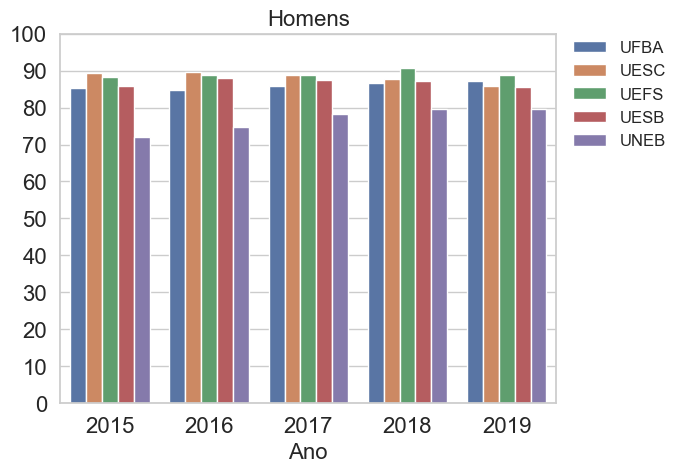

<Figure size 2000x3000 with 0 Axes>

In [26]:
sns.set_theme()
sns.set_style('whitegrid')
ax = sns.barplot(
    data=df_universidades_sexo.loc[df_universidades_sexo.valor == 2],
    y="media", hue="universidade", x='ano'
)

sns.set(font_scale = 1)
plt.figure(figsize=(20, 30))
ax.set_ylabel('')
ax.set_xlabel('Ano', fontsize=16)
ax.set_title('Homens', fontsize=16)
ax.set_yticks([x for x in range(0, 101, 10)])
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,frameon=False,prop={'size':12})
# ax.legend([],[], frameon=False)
ax.tick_params(axis='both', which='major', labelsize=16)

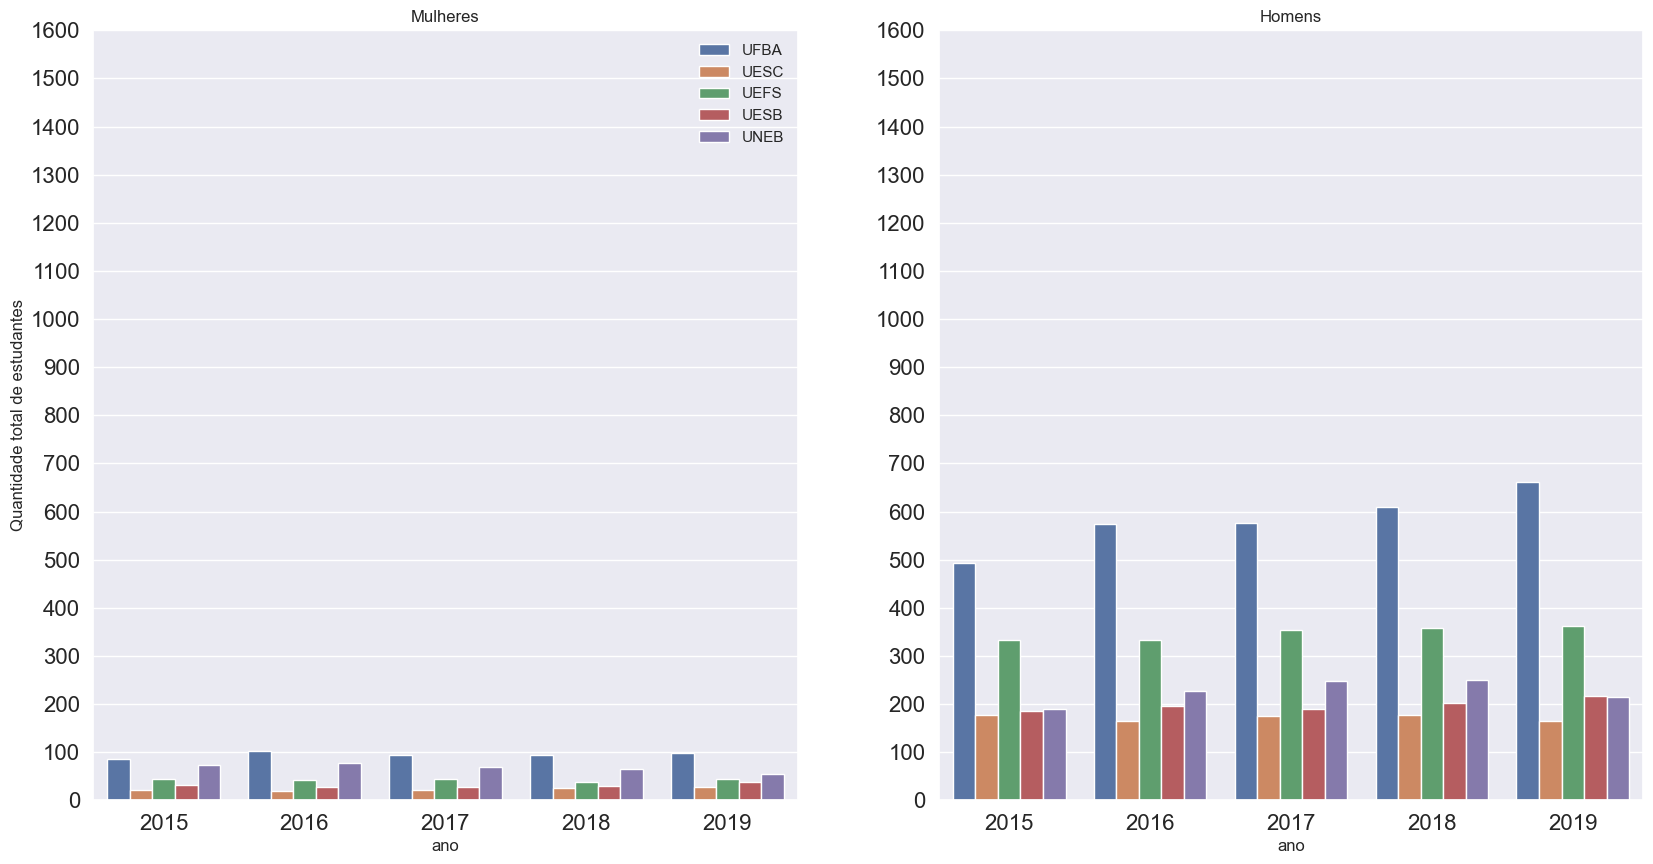

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(
    data=df_universidades_sexo.loc[df_universidades_sexo.valor == 1],
    y="qt_abs", hue="universidade", x='ano', ax=ax[0]
)
ax[0].set_title('Mulheres')
ax[0].set_yticks([x for x in range(0, 1601, 100)])
ax[0].legend(frameon=False)
ax[0].set_ylabel('Quantidade total de estudantes')
ax[0].tick_params(axis='both', which='major', labelsize=16)

sns.barplot(
    data=df_universidades_sexo.loc[df_universidades_sexo.valor == 2],
    y="qt_abs", hue="universidade", x='ano', ax=ax[1]
)
ax[1].set_ylabel('')
ax[1].set_title('Homens')
ax[1].set_yticks([x for x in range(0, 1601, 100)])
ax[1].legend([],[], frameon=False)
ax[1].tick_params(axis='both', which='major', labelsize=16)

## Gráficos de Forma de Ingresso

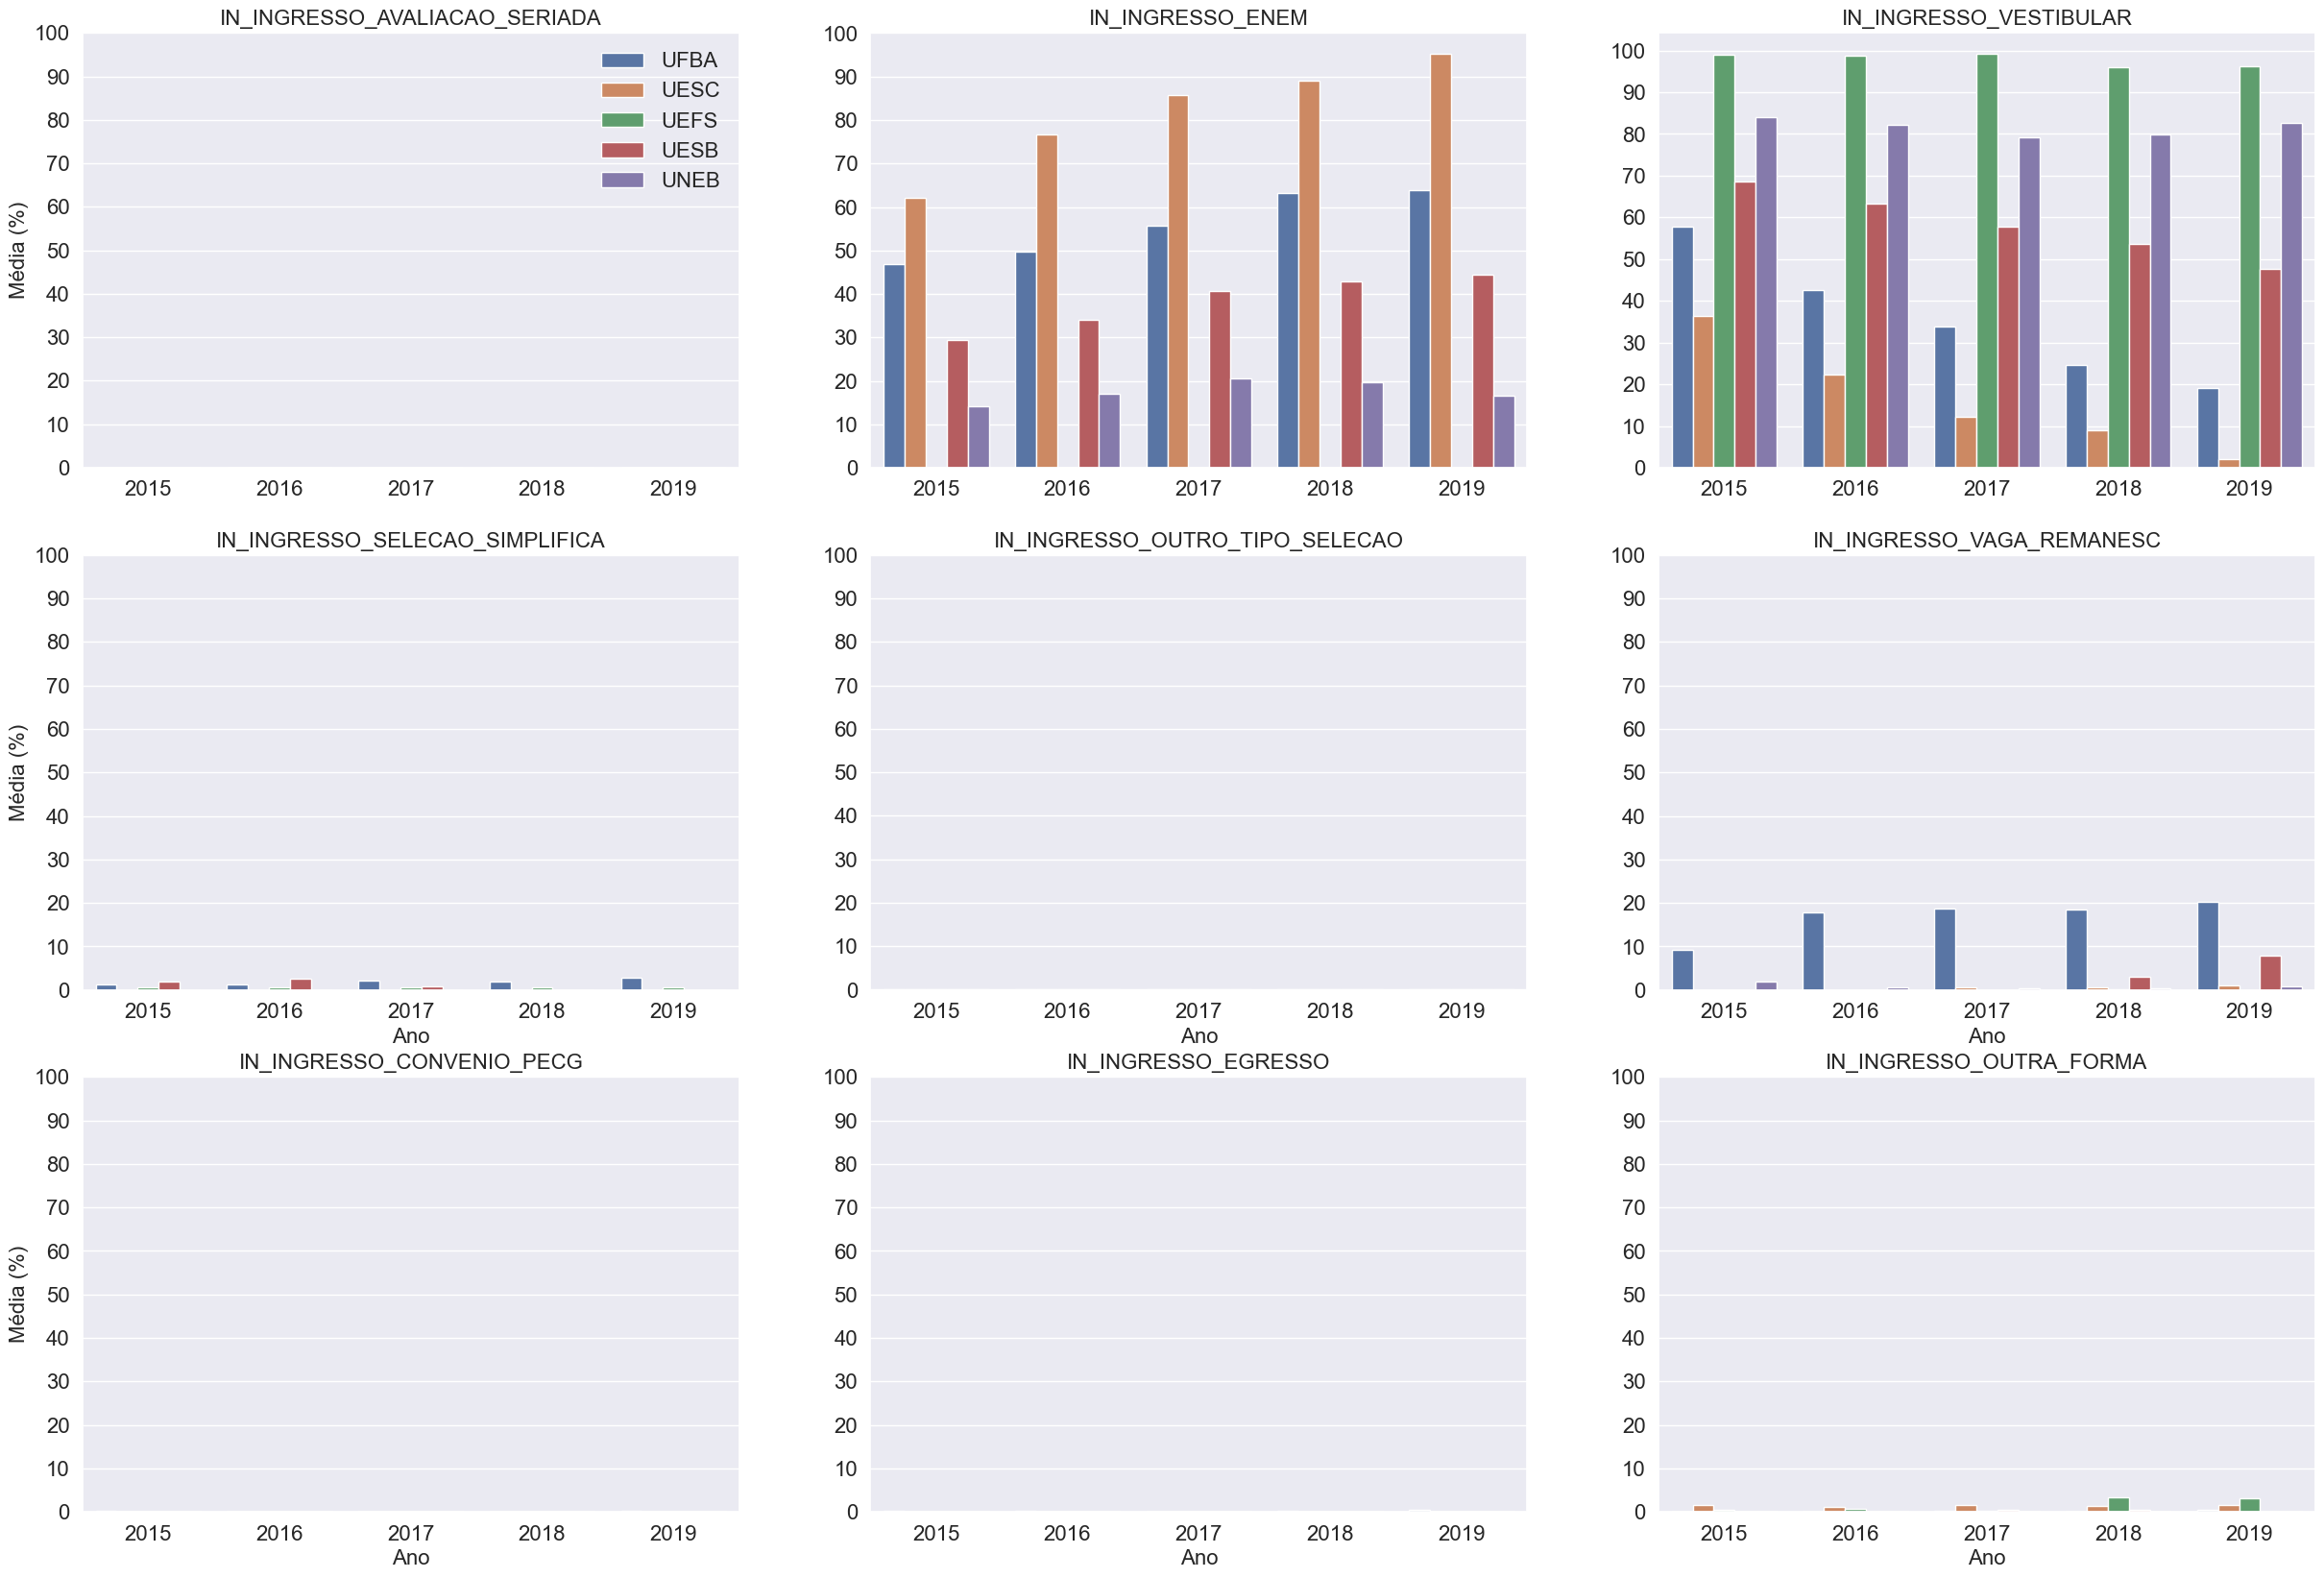

In [29]:
labels = ['IN_INGRESSO_AVALIACAO_SERIADA','IN_INGRESSO_ENEM', 'IN_INGRESSO_VESTIBULAR', 
   'IN_INGRESSO_SELECAO_SIMPLIFICA', 'IN_INGRESSO_OUTRO_TIPO_SELECAO', 'IN_INGRESSO_VAGA_REMANESC',
   'IN_INGRESSO_VAGA_PROG_ESPECIAL', 'IN_INGRESSO_TRANSF_EXOFFICIO', 'IN_INGRESSO_DECISAO_JUDICIAL',
   'IN_INGRESSO_CONVENIO_PECG', 'IN_INGRESSO_EGRESSO', 'IN_INGRESSO_OUTRA_FORMA']
ingresso = df_forma_ingresso.loc[df_forma_ingresso.categoria == 'forma_ingresso']
# gera_graficos(ingresso, labels, 'media', 'Média (%)', [x for x in range(0, 101, 10)])

fig, ax = plt.subplots(3, 3, figsize=(30, 20))
for i in range(len(labels)):
    if i < 3:
        count_row = 0
    elif i >=3 and i < 6:
         count_row = 1
    else: 
        count_row = 2
    sns.barplot(
      data=ingresso.loc[ingresso.valor == labels[i]],
      y='media', hue="universidade", x='ano', ax=ax[count_row][i%3]
   )
    ax[count_row][i%3].set_title(labels[i], fontsize=16)
   # if ticks != False:
    ax[count_row][i%3].set_yticks([x for x in range(0, 101, 10)], fontsize=16)
   # else:
   #     ax[count_row][i%3].set_yticks(fontsize=16)
    ax[count_row][i%3].tick_params(axis='both', which='major', labelsize=16)
    ax[count_row][i%3].set_xlabel('Ano', fontsize=16)
    if i != 0:
        ax[count_row][i%3].legend([],[],frameon=False)
    elif i == 0:
        ax[count_row][i%3].legend(frameon=False, prop={'size': 16})
    if i%3 == 0:
        ax[count_row][i%3].set_ylabel('Média (%)', fontsize=16)
    elif i%3 != 0:
        ax[count_row][i%3].set_ylabel('')
    if i in [0,1,2]:
        ax[count_row][i%3].set_xlabel('')



## Gráficos de Reserva de vagas

In [30]:
labels = ['IN_RESERVA_ETNICO', 'IN_RESERVA_DEFICIENCIA', 
 'IN_RESERVA_ENSINO_PUBLICO', 'IN_RESERVA_RENDA_FAMILIAR',
 'IN_RESERVA_OUTRA']
reserva = df_reserva_vagas.loc[df_reserva_vagas.categoria == 'reserva_vagas']
# gera_graficos(reserva, labels, 'media', 'Média (%)', [x for x in range(0, 101, 10)])


fig, ax = plt.subplots(2, 3, figsize=(30, 20))
for i in range(len(labels)):
    if i < 3:
        count_row = 0
    elif i >=3 and i < 6:
         count_row = 1
    else: 
        count_row = 2
    sns.barplot(
      data=reserva.loc[reserva.valor == labels[i]],
      y='media', hue="universidade", x='ano', ax=ax[count_row][i%3]
   )
    ax[count_row][i%3].set_title(labels[i], fontsize=16)
   # if ticks != False:
    ax[count_row][i%3].set_yticks([x for x in range(0, 101, 10)], fontsize=16)
   # else:
   #     ax[count_row][i%3].set_yticks(fontsize=16)
    ax[count_row][i%3].tick_params(axis='both', which='major', labelsize=16)
    ax[count_row][i%3].set_xlabel('Ano', fontsize=16)
    if i != 0:
        ax[count_row][i%3].legend([],[],frameon=False)
    elif i == 0:
        ax[count_row][i%3].legend(frameon=False, prop={'size': 16})
    if i%3 == 0:
        ax[count_row][i%3].set_ylabel('Média (%)', fontsize=16)
    elif i%3 != 0:
        ax[count_row][i%3].set_ylabel('')
    if i in [0,1,2]:
        ax[count_row][i%3].set_xlabel('')


display(reserva)

NameError: name 'df_reserva_vagas' is not defined

## Gráficos de Deficiências

Text(0.5, 0, 'Ano')

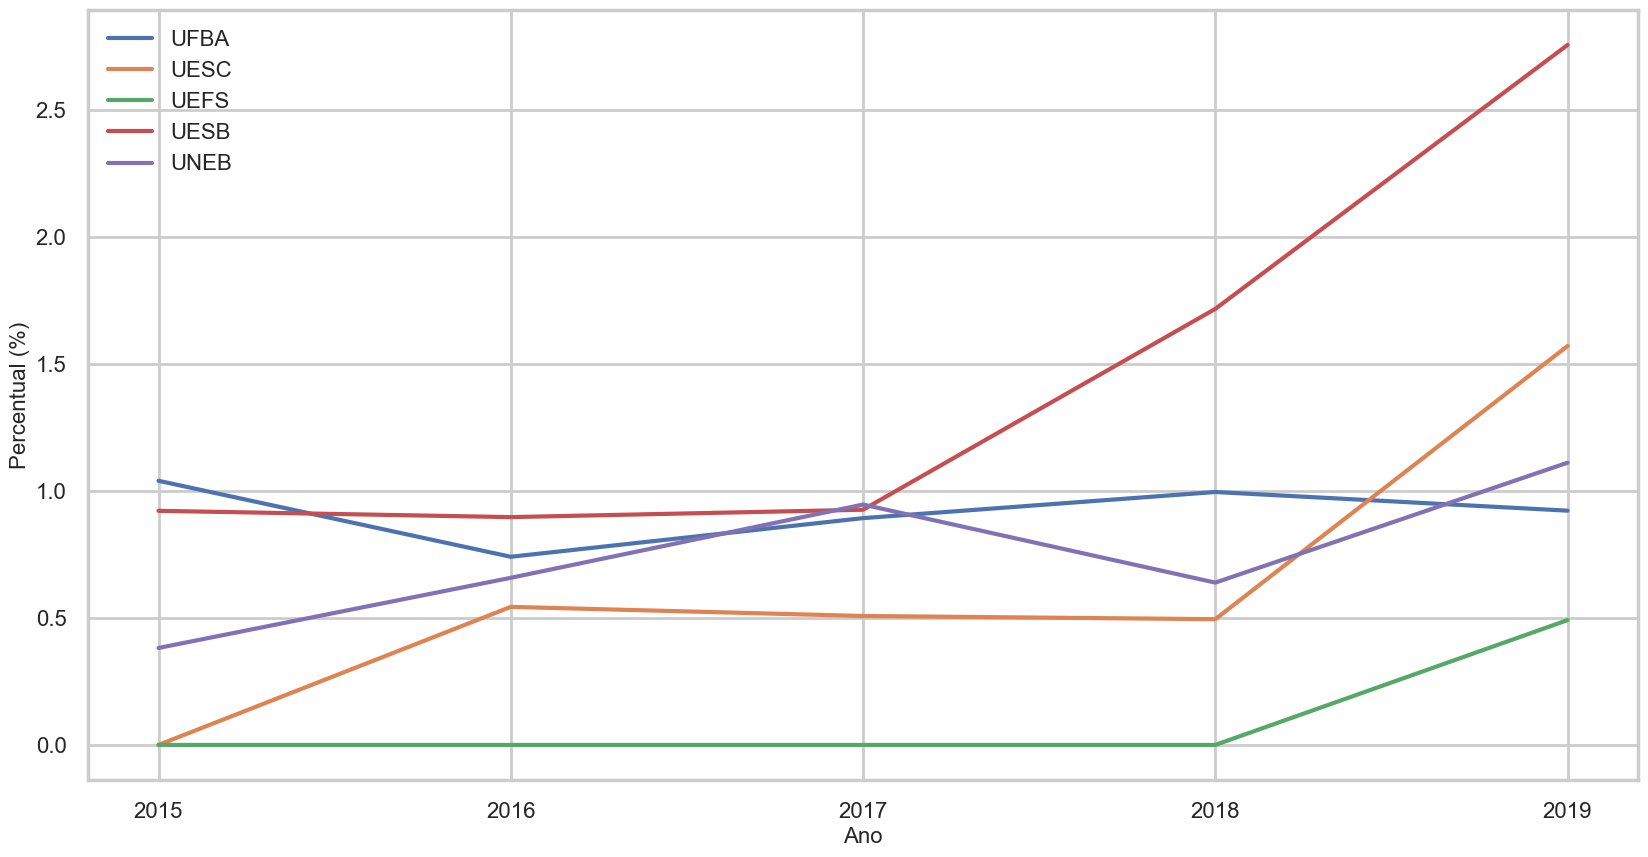

In [31]:
# fig, ax = plt.subplots(1, 1, figsize=(20, 10))
df_universidades_def = df_universidades.loc[df_universidades.categoria == 'IN_DEFICIENCIA']
sns.set(rc={"figure.figsize":(20, 10)})
sns.set_theme('poster')
sns.set_style('whitegrid')
ax = sns.lineplot(
    data=df_universidades_def.loc[df_universidades_def.valor == 1],
    y="media", hue="universidade", x='ano'
)
ax.set_title('', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xticks([x for x in range(2015, 2020)], fontsize=16)
ax.legend(frameon=False, prop={'size': 16})
ax.set_ylabel('Percentual (%)', fontsize=16)
ax.set_xlabel('Ano', fontsize=16)
# sns.barplot(
#     data=df_universidades_def.loc[df_universidades_def.valor == 0],
#     y="media", hue="universidade", x='ano', ax=ax[1]
# )
# ax[1].set_ylabel('')
# ax[1].set_yticks([x for x in range(0, 106, 5)])
# ax[1].tick_params(axis='both', which='major', labelsize=16)
# ax[1].set_title('Sem deficiência', fontsize=16)
# ax[1].legend([],[], frameon=False)
# ax[1].set_xlabel('Ano', fontsize=16)

Text(0.5, 0, 'Ano')

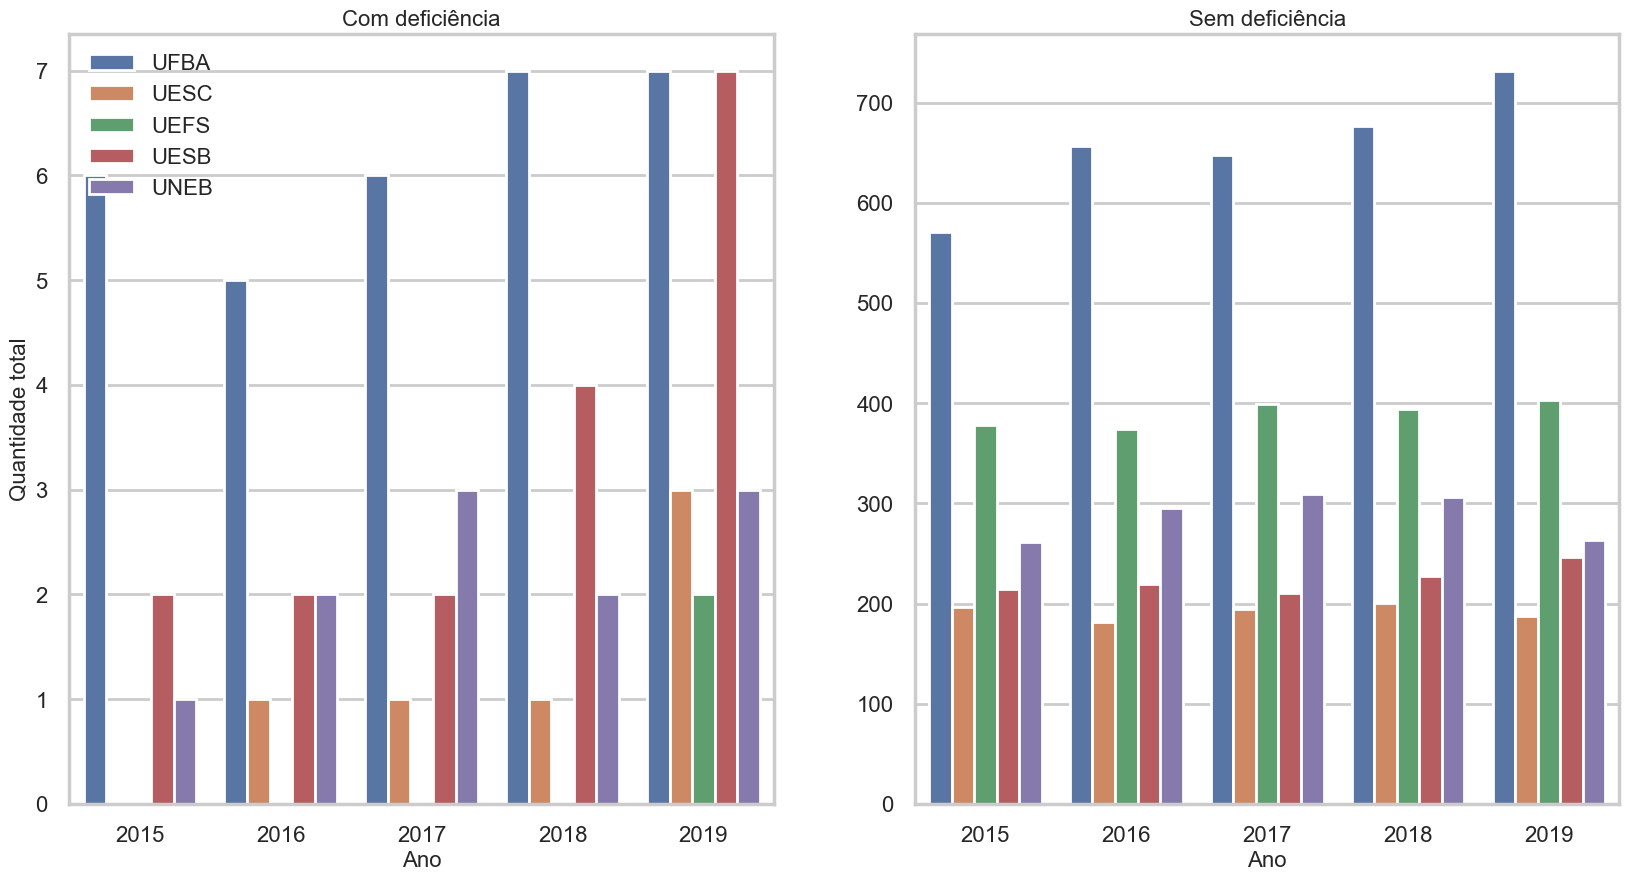

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
df_universidades_def = df_universidades.loc[df_universidades.categoria == 'IN_DEFICIENCIA']
sns.barplot(
    data=df_universidades_def.loc[df_universidades_def.valor == 1],
    y="qt_abs", hue="universidade", x='ano', ax=ax[0]
)
ax[0].set_title('Com deficiência', fontsize=16)
ax[0].tick_params(axis='both', which='major', labelsize=16)
# ax[0].set_yticks([x for x in range(0, 51, 5)])
ax[0].legend(frameon=False, prop={'size': 16})
ax[0].set_ylabel('Quantidade total', fontsize=16)
ax[0].set_xlabel('Ano', fontsize=16)

sns.barplot(
    data=df_universidades_def.loc[df_universidades_def.valor == 0],
    y="qt_abs", hue="universidade", x='ano', ax=ax[1]
)
ax[1].set_ylabel('')
ax[1].tick_params(axis='both', which='major', labelsize=16)
# ax[1].set_yticks([x for x in range(0, 51, 5)])
ax[1].set_title('Sem deficiência', fontsize=16)
ax[1].legend([],[], frameon=False)
ax[1].set_xlabel('Ano', fontsize=16)

#### Descrição das deficiencias - gráficos

In [34]:
labels = ['IN_DEFICIENCIA_AUDITIVA',
'IN_DEFICIENCIA_FISICA',
'IN_DEFICIENCIA_INTELECTUAL',
'IN_DEFICIENCIA_MULTIPLA',
'IN_DEFICIENCIA_SURDEZ',
'IN_DEFICIENCIA_BAIXA_VISAO',
'IN_TGD_AUTISMO',
'IN_TGD_SINDROME_ASPERGER',
'IN_TGD_TRANSTOR_DESINTEGRATIVO']

dados = df_deficiencia_desc.loc[df_deficiencia_desc.categoria == 'deficiencia_desc']
# gera_graficos(dados, labels, 'media', 'Média (%)', [x for x in range(0, 101, 10)])

# display(dados)

fig, ax = plt.subplots(3, 3, figsize=(25, 35))
for i in range(len(labels)):
    if i < 3:
        count_row = 0
    elif i >=3 and i < 6:
         count_row = 1
    elif i >=6 and i < 9:
         count_row = 2
    elif i >=9 and i < 12:
         count_row = 3
    else: 
        count_row = 4
    sns.barplot(
      data=dados.loc[dados.valor == labels[i]],
      y='media', hue="universidade", x='ano', ax=ax[count_row][i%3]
   )
    ax[count_row][i%3].set_title(labels[i], fontsize=16)
   # if ticks != False:
    ax[count_row][i%3].set_yticks([0, 0.25 ,0.5, 0.75, 1, 1.25, 1.5, 1.75, 2], fontsize=16)
   # else:
   #     ax[count_row][i%3].set_yticks(fontsize=16)
    ax[count_row][i%3].tick_params(axis='both', which='major', labelsize=16)
    ax[count_row][i%3].set_xlabel('Ano', fontsize=16)
    if i != 0:
        ax[count_row][i%3].legend([],[],frameon=False)
    elif i == 0:
        ax[count_row][i%3].legend(frameon=False, prop={'size': 16})
    if i%3 == 0:
        ax[count_row][i%3].set_ylabel('Média (%)', fontsize=16)
    elif i%3 != 0:
        ax[count_row][i%3].set_ylabel('')
    if i in [0,1,2]:
        ax[count_row][i%3].set_xlabel('')

NameError: name 'df_deficiencia_desc' is not defined

In [35]:
df_universidades_def.valor.unique()

array([0, 1], dtype=object)

In [36]:
def gera_graficos(data:pd.DataFrame, labels, tipo, nome_tipo, ticks = [x for x in range(0, 101, 10)]):
    fig, ax = plt.subplots(2, len(labels)//2, figsize=(20, 10))
    for i in range(len(labels)):
        if i >= (len(labels)//2):
            count_row = 1
        else: 
            count_row = 0
        sns.barplot(
            data=data.loc[data.valor == labels[i]],
            y=tipo, hue="universidade", x='ano', ax=ax[count_row][i%3]
        )
        ax[count_row][i%3].set_title(labels[i], fontsize=16)
        if ticks != False:
            ax[count_row][i%3].set_yticks(ticks, fontsize=16)
        # else:
        #     ax[count_row][i%3].set_yticks(fontsize=16)
        ax[count_row][i%3].tick_params(axis='both', which='major', labelsize=16)
        ax[count_row][i%3].set_xlabel('Ano', fontsize=16)
        if i != 0:
            ax[count_row][i%3].legend([],[],frameon=False)
        elif i == 0:
            ax[count_row][i%3].legend(frameon=False, prop={'size': 16})
        if i%3 == 0:
            ax[count_row][i%3].set_ylabel(nome_tipo, fontsize=16)
        elif i%3 != 0:
            ax[count_row][i%3].set_ylabel('')
        if i in [0,1,2]:
            ax[count_row][i%3].set_xlabel('')

## Gráficos de Cor/Raça

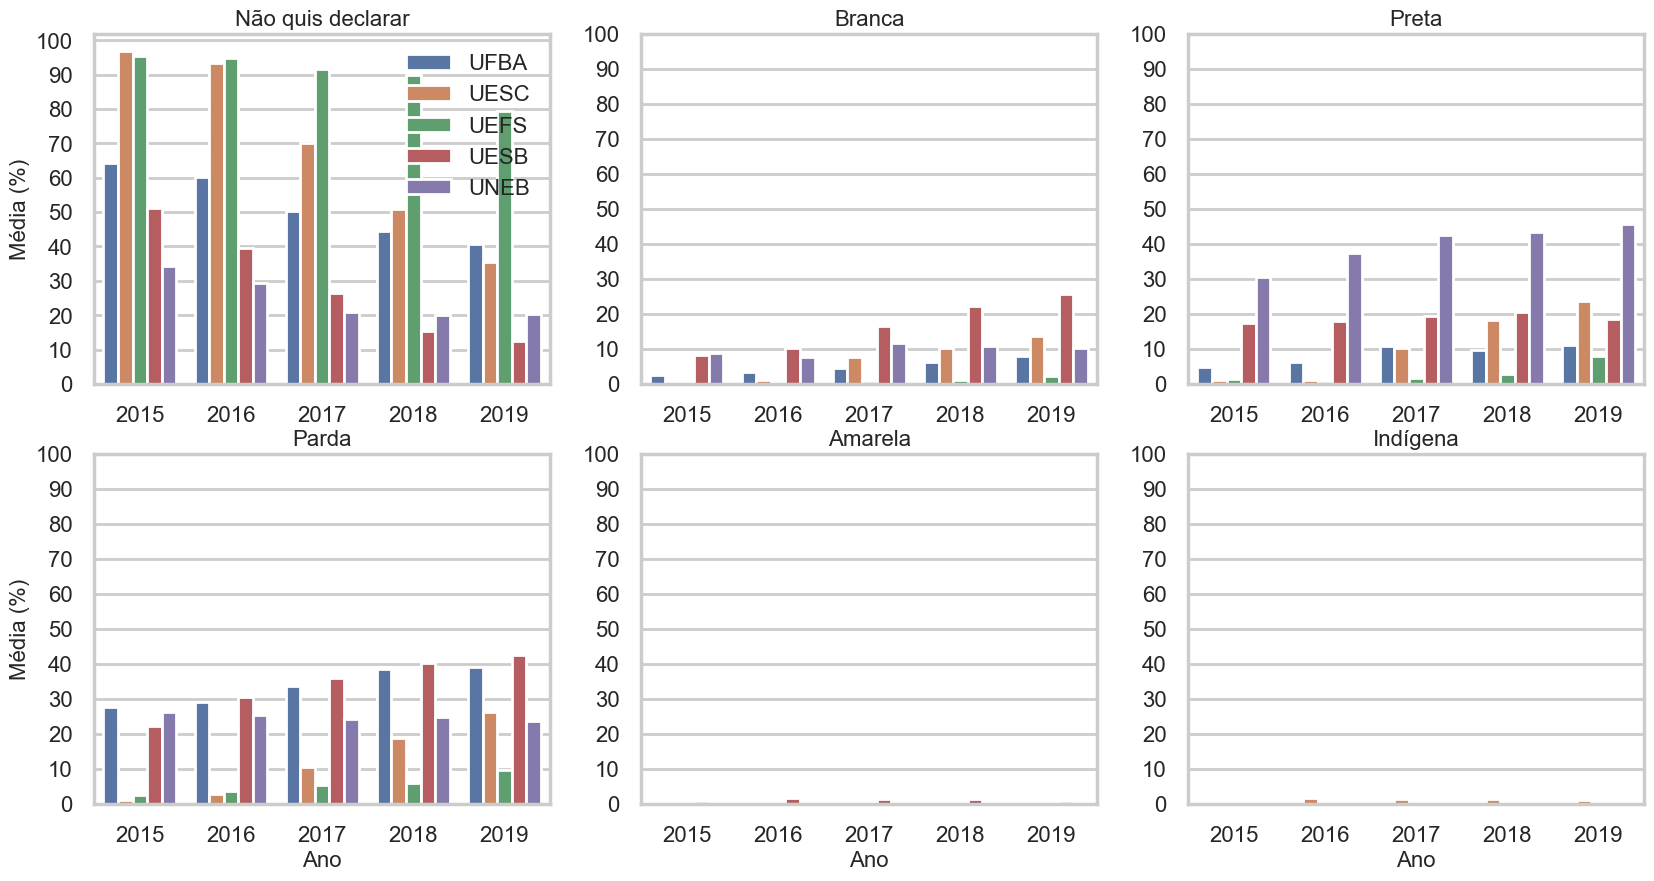

In [37]:
labels = ['Não quis declarar', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
df_universidades_cor = df_universidades.loc[df_universidades.categoria == 'TP_COR_RACA']
gera_graficos(df_universidades_cor, labels, 'media', 'Média (%)', [x for x in range(0, 101, 10)])

# display(df_universidades_cor)

,universidade,ano,categoria,valor,qt_abs,media
4,UFBA,2015,TP_COR_RACA,Não quis declarar,371,64.298094
5,UFBA,2015,TP_COR_RACA,Branca,15,2.599653
6,UFBA,2015,TP_COR_RACA,Preta,28,4.852686
7,UFBA,2015,TP_COR_RACA,Parda,160,27.729636
8,UFBA,2015,TP_COR_RACA,Amarela,3,0.519931
9,UFBA,2015,TP_COR_RACA,Indígena,0,0.000000
10,UFBA,2015,TP_COR_RACA,Sem informação,0,0.000000
21,UFBA,2016,TP_COR_RACA,Não quis declarar,406,60.148148
22,UFBA,2016,TP_COR_RACA,Branca,23,3.407407
23,UFBA,2016,TP_COR_RACA,Preta,43,6.370370


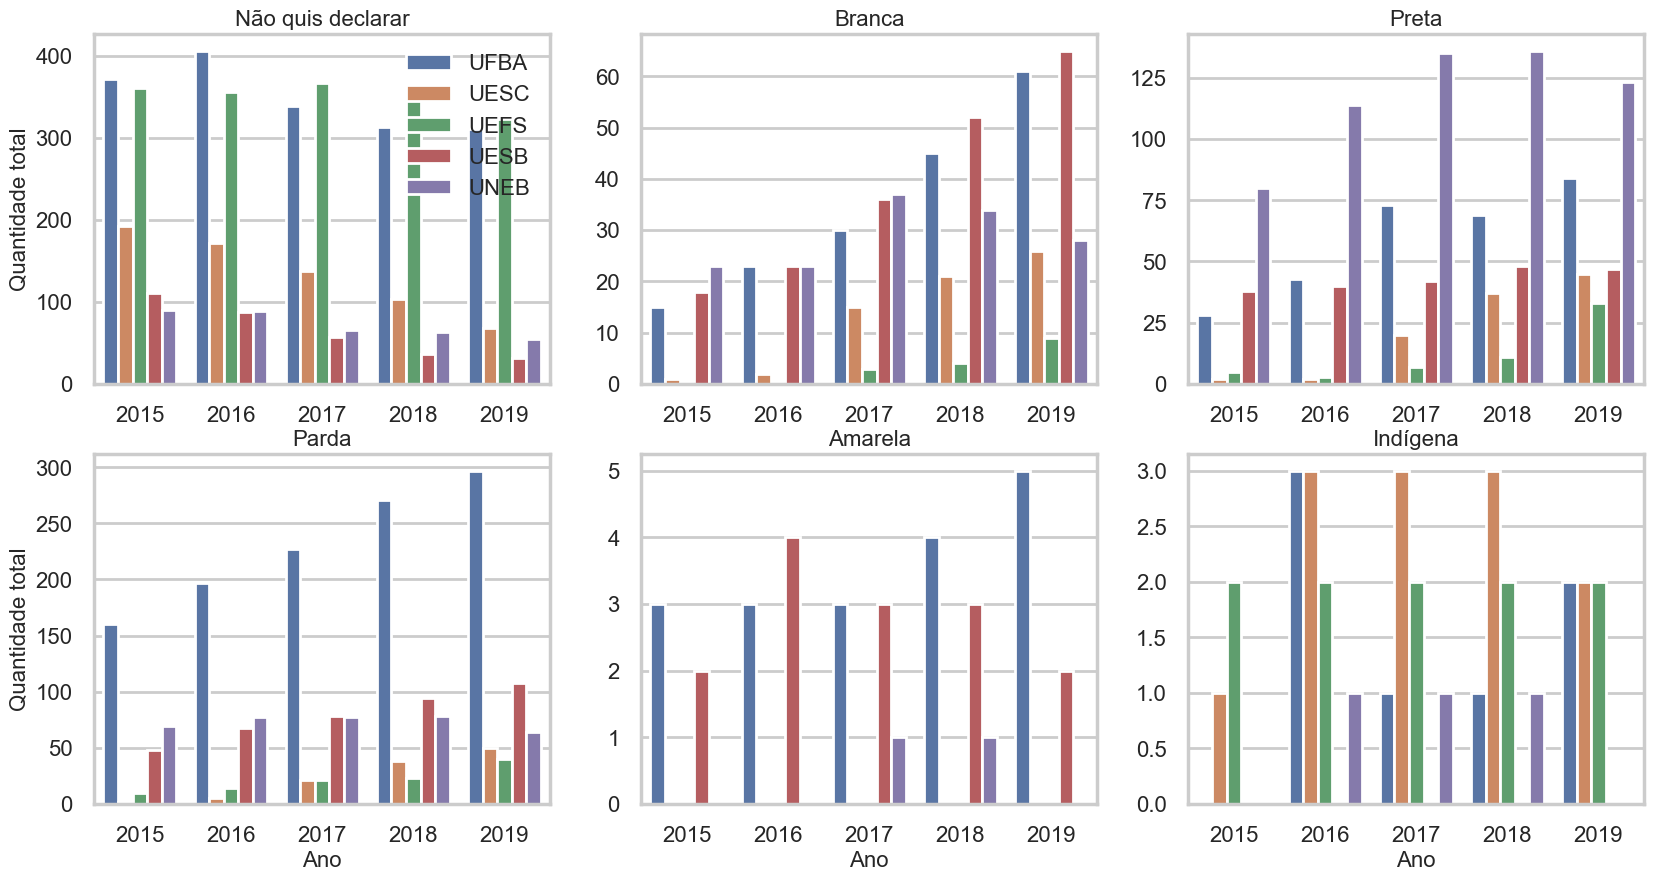

In [38]:
labels = ['Não quis declarar', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
df_universidades_cor = df_universidades.loc[df_universidades.categoria == 'TP_COR_RACA']

gera_graficos(df_universidades_cor, labels, 'qt_abs', 'Quantidade total', False)

display(df_universidades_cor)

## Gráficos de Idade

In [39]:
labels = ['até 18 anos', '18 - 24 anos', '25 - 34 anos', '35 - 44 anos',
       '45 - 59 anos', '60 - 99 anos']
df_universidades_idade = df_universidades.loc[df_universidades.categoria == 'NU_IDADE']

# gera_graficos(df_universidades_idade, labels, 'media', 'Média (%)')

display(df_universidades_idade)

,universidade,ano,categoria,valor,qt_abs,media
11,UFBA,2015,NU_IDADE,até 18 anos,0,0.000000
12,UFBA,2015,NU_IDADE,18 - 24 anos,381,66.031196
13,UFBA,2015,NU_IDADE,25 - 34 anos,171,29.636049
14,UFBA,2015,NU_IDADE,35 - 44 anos,18,3.119584
15,UFBA,2015,NU_IDADE,45 - 59 anos,6,1.039861
16,UFBA,2015,NU_IDADE,60 - 99 anos,1,0.173310
28,UFBA,2016,NU_IDADE,até 18 anos,1,0.148148
29,UFBA,2016,NU_IDADE,18 - 24 anos,410,60.740741
30,UFBA,2016,NU_IDADE,25 - 34 anos,226,33.481481
31,UFBA,2016,NU_IDADE,35 - 44 anos,29,4.296296


,universidade,ano,categoria,valor,qt_abs,media
11,UFBA,2015,NU_IDADE,até 18 anos,0,0.000000
12,UFBA,2015,NU_IDADE,18 - 24 anos,381,66.031196
13,UFBA,2015,NU_IDADE,25 - 34 anos,171,29.636049
14,UFBA,2015,NU_IDADE,35 - 44 anos,18,3.119584
15,UFBA,2015,NU_IDADE,45 - 59 anos,6,1.039861
16,UFBA,2015,NU_IDADE,60 - 99 anos,1,0.173310
28,UFBA,2016,NU_IDADE,até 18 anos,1,0.148148
29,UFBA,2016,NU_IDADE,18 - 24 anos,410,60.740741
30,UFBA,2016,NU_IDADE,25 - 34 anos,226,33.481481
31,UFBA,2016,NU_IDADE,35 - 44 anos,29,4.296296


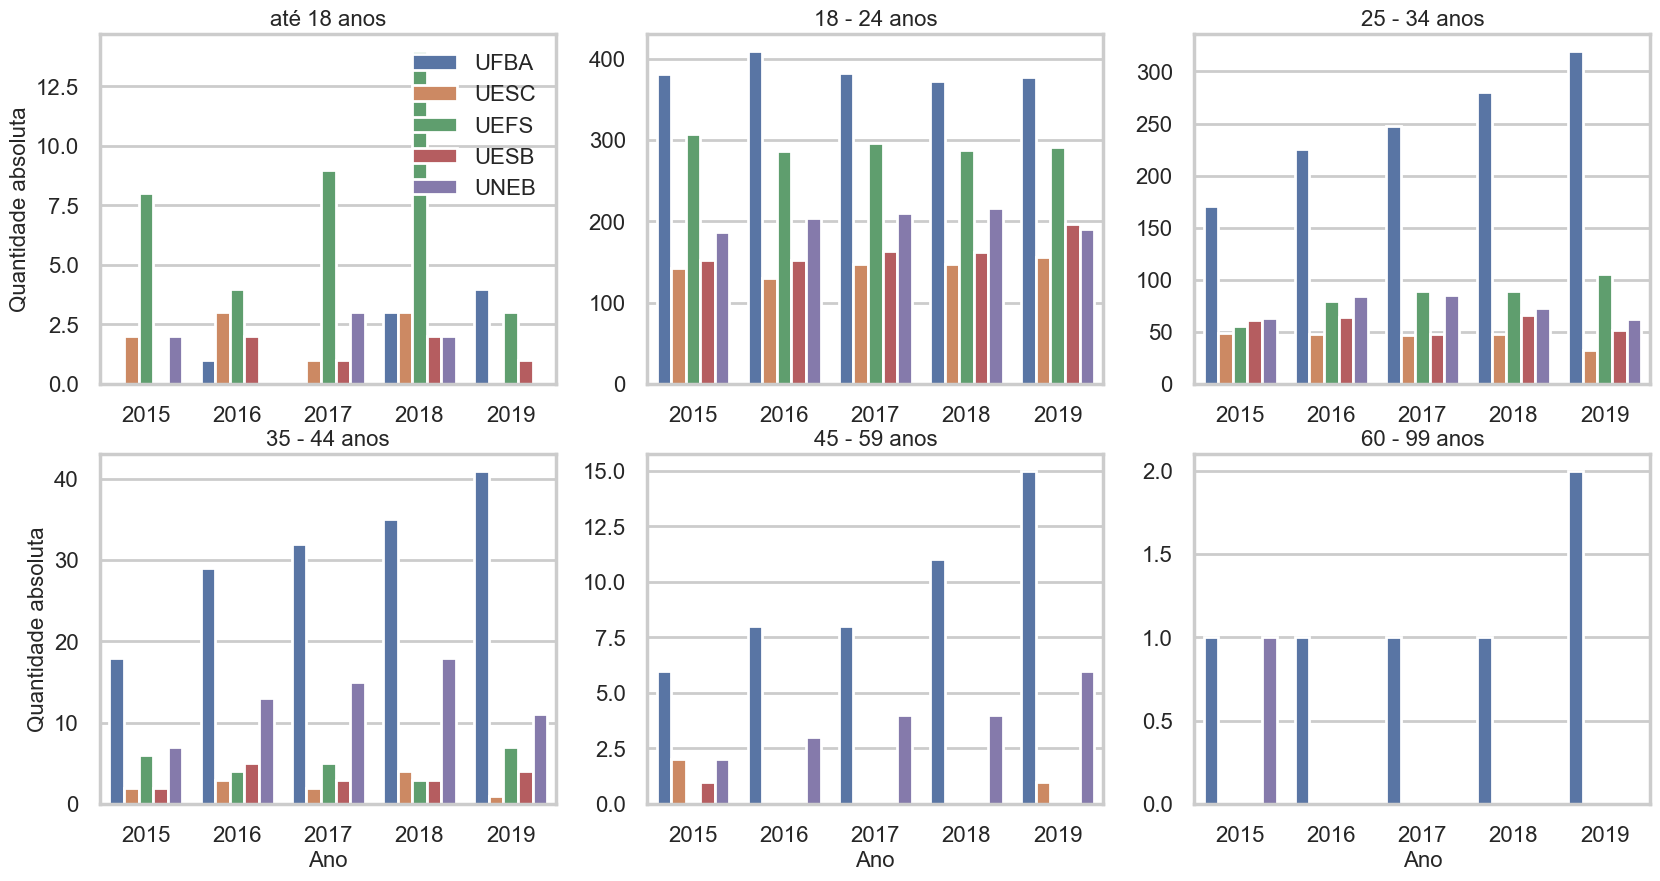

In [40]:
labels = ['até 18 anos', '18 - 24 anos', '25 - 34 anos', '35 - 44 anos',
       '45 - 59 anos', '60 - 99 anos']
df_universidades_idade = df_universidades.loc[df_universidades.categoria == 'NU_IDADE']

gera_graficos(df_universidades_idade, labels, 'qt_abs', 'Quantidade absoluta', False)

display(df_universidades_idade)

In [41]:
import plotly.express as px
import pandas as pd
# ['IN_RESERVA_ETNICO', 'IN_RESERVA_DEFICIENCIA', 
#  'IN_RESERVA_ENSINO_PUBLICO', 'IN_RESERVA_RENDA_FAMILIAR',
#  'IN_RESERVA_OUTRA']
# df = pd.DataFrame(dict(
#     r=[1, 5, 2, 2, 3],
#     theta=['processing cost','mechanical properties','chemical stability',
#            'thermal stability', 'device integration']))
fig = px.line_polar(reserva, r='media', theta='valor', line_close=True)
fig.show()

NameError: name 'reserva' is not defined

In [ ]:
import plotly.graph_objects as go

categories = ['IN_RESERVA_ETNICO', 'IN_RESERVA_DEFICIENCIA', 
 'IN_RESERVA_ENSINO_PUBLICO', 'IN_RESERVA_RENDA_FAMILIAR',
 'IN_RESERVA_OUTRA']

fig = go.Figure()
# print(reserva.universidade.unique())
unis = reserva.universidade.unique().tolist()
medias_v = []
for i in range(len(unis)):
  medias = reserva.loc[(reserva.universidade == unis[i]) & (reserva.ano == 2015)].media.tolist()
  medias_v.append(medias)
  print( )
  fig.add_trace(go.Scatterpolar(
        r=medias,
        theta=categories,
        name=unis[i]
  ))
# fig.add_trace(go.Scatterpolar(
#       r=[4, 3, 2.5, 1, 2],
#       theta=categories,
#       fill='toself',
#       name='Product B'
# ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
      # range=[0, 5]
    )),
  showlegend=False
)

fig.show()

In [ ]:
import plotly.express as px

print(medias_v)
# data=[[1, 25, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, 5, 20]]

fig = px.imshow(medias_v,
                labels=dict(x="2015", y="Universidades", origin='lower'),
                x=categories,
                color_continuous_scale='Viridis',
                y=unis,
                text_auto=True, aspect="auto"
               )
# fig.update_xaxes()
fig.show()

In [ ]:
df_forma_ingresso.head()

In [ ]:
unis = df_forma_ingresso.universidade.unique().tolist()
medias_v = []
for i in range(len(unis)):
    medias = df_forma_ingresso.loc[(df_forma_ingresso.universidade == unis[i]) & (df_forma_ingresso.ano == 2015)].media.tolist()
    medias_v.append(medias)
medias_v

In [44]:
import numpy as np

def gera_heatmap_anos(data:pd.DataFrame, ano, vetor_form_ingresso):
    unis = data.universidade.unique().tolist()
    vetor = []
    for i in range(len(unis)):
        medias = data.loc[(data.universidade == unis[i]) & (data.ano == ano)].media.tolist()
        for x in medias:
            vetor.append(x)
    #  vetor = gerar_taxas_evasao(base_dados_n1, base_dados_n2)
    vetor_genero = unis
    tam = len(vetor_form_ingresso)

    x = np.array(np.tile(vetor_form_ingresso, len(vetor_genero)))
    y = np.array(np.repeat(vetor_genero, tam))
    z = np.array(vetor)

    dfn1_n2 = pd.DataFrame.from_dict(np.array([x,y,z]).T)
    dfn1_n2.columns = ['Seleção','Universidades','%']
    dfn1_n2['%'] = pd.to_numeric(dfn1_n2['%'])
    pivotted_n1_n2= dfn1_n2.pivot('Seleção','Universidades','%')
    plt.figure(figsize=(9,16))

    pivotted_n1_n2.index = pd.CategoricalIndex(pivotted_n1_n2.index, categories=vetor_form_ingresso)
    pivotted_n1_n2.sort_index(level=0, inplace=True)
      # sns.heatmap(pivotted_n1_n2,annot=True, linewidths=4, fmt='0.2f')
    return pivotted_n1_n2

### Forma de ingresso

#### preparando para fazer os heatmaps

In [45]:
vetor_form_ingresso = ['IN_INGRESSO_AVALIACAO_SERIADA','IN_INGRESSO_ENEM', 'IN_INGRESSO_VESTIBULAR', 
   'IN_INGRESSO_SELECAO_SIMPLIFICA', 'IN_INGRESSO_OUTRO_TIPO_SELECAO', 'IN_INGRESSO_VAGA_REMANESC',
   'IN_INGRESSO_VAGA_PROG_ESPECIAL', 'IN_INGRESSO_TRANSF_EXOFFICIO', 'IN_INGRESSO_DECISAO_JUDICIAL',
   'IN_INGRESSO_CONVENIO_PECG', 'IN_INGRESSO_EGRESSO', 'IN_INGRESSO_OUTRA_FORMA']
pivotted2015 = gera_heatmap_anos(df_forma_ingresso, 2015, vetor_form_ingresso)
pivotted2016 = gera_heatmap_anos(df_forma_ingresso, 2016, vetor_form_ingresso)
pivotted2017 = gera_heatmap_anos(df_forma_ingresso, 2017, vetor_form_ingresso)
pivotted2018 = gera_heatmap_anos(df_forma_ingresso, 2018, vetor_form_ingresso)
pivotted2019 = gera_heatmap_anos(df_forma_ingresso, 2019, vetor_form_ingresso)

C:\Users\solen\AppData\Local\Temp\ipykernel_13044\4008664258.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dfn1_n2 = pd.DataFrame.from_dict(np.array([x,y,z]).T)


ValueError: Length mismatch: Expected axis has 1 elements, new values have 3 elements

In [46]:
vetor_form_ingresso = ['Enem', 'Vestibular', 
   'Seleção simplificada', 'Vaga remanescente',
   'Vaga especial', 'Transferência', 'Decisão judicial',
   'Convênio']

map_ingresso = {
   'valor':{
      'IN_INGRESSO_ENEM': 'Enem',
      'IN_INGRESSO_VESTIBULAR': 'Vestibular', 
      'IN_INGRESSO_SELECAO_SIMPLIFICA': 'Seleção simplificada', 
      'IN_INGRESSO_VAGA_REMANESC': 'Vaga remanescente',
      'IN_INGRESSO_VAGA_PROG_ESPECIAL': 'Vaga especial',
      'IN_INGRESSO_TRANSF_EXOFFICIO': 'Transferência', 
      'IN_INGRESSO_DECISAO_JUDICIAL': 'Decisão judicial',
      'IN_INGRESSO_CONVENIO_PECG': 'Convênio'
   }
}
df_forma_ingresso_reduzida = df_forma_ingresso.loc[df_forma_ingresso.replace(map_ingresso).valor.isin(vetor_form_ingresso)]
pivotted_1_2015 = gera_heatmap_anos(df_forma_ingresso_reduzida.replace(map_ingresso), 2015, vetor_form_ingresso)
pivotted_1_2016 = gera_heatmap_anos(df_forma_ingresso_reduzida.replace(map_ingresso), 2016, vetor_form_ingresso)
pivotted_1_2017 = gera_heatmap_anos(df_forma_ingresso_reduzida.replace(map_ingresso), 2017, vetor_form_ingresso)
pivotted_1_2018 = gera_heatmap_anos(df_forma_ingresso_reduzida.replace(map_ingresso), 2018, vetor_form_ingresso)
pivotted_1_2019 = gera_heatmap_anos(df_forma_ingresso_reduzida.replace(map_ingresso), 2019, vetor_form_ingresso)

C:\Users\solen\AppData\Local\Temp\ipykernel_13044\4008664258.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dfn1_n2 = pd.DataFrame.from_dict(np.array([x,y,z]).T)


ValueError: Length mismatch: Expected axis has 1 elements, new values have 3 elements

#### Plotando

In [47]:
from matplotlib.colors import BoundaryNorm, ListedColormap

def criar_heatmap(pivotted2015,pivotted2016,pivotted2017,pivotted2018,pivotted2019,vmax=100):
    fig, axes = plt.subplots(1, 5, figsize=(55, 15), sharey=True)
    # plt.subplots_adjust(right = 0.9)
    plt.tight_layout()
    sns.set(font_scale = 2.8)
    
    # cmap = sns.color_palette("Blues", as_cmap=True)
    cmap = sns.color_palette("Blues", as_cmap=True)
    ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 50, 80, 100]
    # my_norm = BoundaryNorm(bounds, ncolors=len(bounds))
    sns.heatmap(pivotted2015,annot=True, linewidths=0.3, fmt='.1f', ax=axes[0],
                cbar = False, cmap=cmap, vmin = 0, vmax = vmax, mask = pivotted2015 <= 0)
    axes[0].set_title('2015')
    axes[0].set_xlabel('')
    # axes[0].set_ylabel('Forma de Ingresso')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 45)
    axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation = 0)
    axes[0].set_ylabel('')

    sns.heatmap(pivotted2016,annot=True, linewidths=0.3, fmt='.1f', ax=axes[1], 
                cbar = False, cmap=cmap, vmin = 0, vmax = vmax ,mask = pivotted2016 <= 0)
    axes[1].set_title('2016')
    axes[1].set_ylabel('')
    axes[1].set_xlabel('')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 45)

    sns.heatmap(pivotted2017,annot=True, linewidths=0.3, fmt='.1f', ax=axes[2],
                cbar = False, cmap=cmap, vmin = 0, vmax = vmax ,mask = pivotted2017 <= 0)
    axes[2].set_title('2017')
    axes[2].set_ylabel('')
    axes[2].set_xlabel('')
    axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation = 45)

    sns.heatmap(pivotted2018,annot=True, linewidths=0.3, fmt='.1f', ax=axes[3],
                cbar = False, cmap=cmap, vmin = 0, vmax = vmax ,mask = pivotted2018 <= 0)
    axes[3].set_title('2018')
    axes[3].set_ylabel('')
    axes[3].set_xlabel('')
    axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation = 45)

    sns.heatmap(pivotted2019, annot=True, linewidths=0.3, fmt='.1f',
                ax=axes[4], vmin = 0, cmap=cmap, vmax = vmax, mask = pivotted2019 <= 0)
    axes[4].set_title('2019')
    axes[4].set_ylabel('')
    # ax[4].set_yticks(ticks)
    axes[4].set_xlabel('')
    axes[4].set_xticklabels(axes[4].get_xticklabels(), rotation = 45)

Plot com todas as formas de ingresso

Plot com apenas as formas de ingresso que não estão zeradas

In [48]:
criar_heatmap(pivotted_1_2015,pivotted_1_2016,pivotted_1_2017,pivotted_1_2018,pivotted_1_2019, vmax=100)

NameError: name 'pivotted_1_2015' is not defined

### Idade

### Tipo de Vaga

In [49]:
categories = ['Étnico', 'Deficiência', 
 'Ensino público', 'Renda familiar',
 'Outra']

map_ingresso = {
   'valor':{
      'IN_INGRESSO_ENEM': 'Enem',
      'IN_INGRESSO_VESTIBULAR': 'Vestibular', 
      'IN_INGRESSO_SELECAO_SIMPLIFICA': 'Seleção simplificada', 
      'IN_INGRESSO_VAGA_REMANESC': 'Vaga remanescente',
      'IN_INGRESSO_VAGA_PROG_ESPECIAL': 'Vaga especial',
      'IN_INGRESSO_TRANSF_EXOFFICIO': 'Transferência', 
      'IN_INGRESSO_DECISAO_JUDICIAL': 'Decisão judicial',
      'IN_INGRESSO_CONVENIO_PECG': 'Convênio',
      
      'IN_RESERVA_ETNICO':'Étnico', 
      'IN_RESERVA_DEFICIENCIA':'Deficiência', 
      'IN_RESERVA_ENSINO_PUBLICO':'Ensino público', 
      'IN_RESERVA_RENDA_FAMILIAR':'Renda familiar',
      'IN_RESERVA_OUTRA':'Outra'
   }
}
reserva_reduzida = reserva.loc[reserva.replace(map_ingresso).valor.isin(categories)]
pivotted_2_2015 = gera_heatmap_anos(reserva_reduzida.replace(map_ingresso), 2015, categories)
pivotted_2_2016 = gera_heatmap_anos(reserva_reduzida.replace(map_ingresso), 2016, categories)
pivotted_2_2017 = gera_heatmap_anos(reserva_reduzida.replace(map_ingresso), 2017, categories)
pivotted_2_2018 = gera_heatmap_anos(reserva_reduzida.replace(map_ingresso), 2018, categories)
pivotted_2_2019 = gera_heatmap_anos(reserva_reduzida.replace(map_ingresso), 2019, categories)

NameError: name 'reserva' is not defined

In [50]:
criar_heatmap(pivotted_2_2015,pivotted_2_2016,pivotted_2_2017,pivotted_2_2018,pivotted_2_2019, vmax=65)

NameError: name 'pivotted_2_2015' is not defined

In [51]:
categories = ['até 18 anos', '18 - 24 anos', '25 - 34 anos', '35 - 44 anos',
       '45 - 59 anos', '60 - 99 anos']

map_ingresso = {
   'valor':{
      'IN_INGRESSO_ENEM': 'Enem',
      'IN_INGRESSO_VESTIBULAR': 'Vestibular', 
      'IN_INGRESSO_SELECAO_SIMPLIFICA': 'Seleção simplificada', 
      'IN_INGRESSO_VAGA_REMANESC': 'Vaga remanescente',
      'IN_INGRESSO_VAGA_PROG_ESPECIAL': 'Vaga especial',
      'IN_INGRESSO_TRANSF_EXOFFICIO': 'Transferência', 
      'IN_INGRESSO_DECISAO_JUDICIAL': 'Decisão judicial',
      'IN_INGRESSO_CONVENIO_PECG': 'Convênio',
      
      'IN_RESERVA_ETNICO':'Étnico', 
      'IN_RESERVA_DEFICIENCIA':'Deficiência', 
      'IN_RESERVA_ENSINO_PUBLICO':'Ensino público', 
      'IN_RESERVA_RENDA_FAMILIAR':'Renda familiar',
      'IN_RESERVA_OUTRA':'Outra'
   }
}
df_universidades_idade_reduzida = df_universidades_idade.loc[df_universidades_idade.replace(map_ingresso).valor.isin(categories)]
pivotted_3_2015 = gera_heatmap_anos(df_universidades_idade_reduzida.replace(map_ingresso), 2015, categories)
pivotted_3_2016 = gera_heatmap_anos(df_universidades_idade_reduzida.replace(map_ingresso), 2016, categories)
pivotted_3_2017 = gera_heatmap_anos(df_universidades_idade_reduzida.replace(map_ingresso), 2017, categories)
pivotted_3_2018 = gera_heatmap_anos(df_universidades_idade_reduzida.replace(map_ingresso), 2018, categories)
pivotted_3_2019 = gera_heatmap_anos(df_universidades_idade_reduzida.replace(map_ingresso), 2019, categories)

C:\Users\solen\AppData\Local\Temp\ipykernel_13044\4008664258.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dfn1_n2 = pd.DataFrame.from_dict(np.array([x,y,z]).T)


ValueError: Length mismatch: Expected axis has 1 elements, new values have 3 elements

In [52]:
criar_heatmap(pivotted_3_2015,pivotted_3_2016,pivotted_3_2017,pivotted_3_2018,pivotted_3_2019, vmax=80)

NameError: name 'pivotted_3_2015' is not defined

In [53]:
categories = ['Auditiva',
'Física',
'Intelectual',
'Múltipla',
'Surdez',
'Baixa visão',
'Cegueira',
'Superdotação',
'Autismo',
'Síndrome Asperger',
'Síndrome Rett',
'Transtorno desintegrativo']

map_ingresso = {
   'valor':{
      'IN_INGRESSO_ENEM': 'Enem',
      'IN_INGRESSO_VESTIBULAR': 'Vestibular', 
      'IN_INGRESSO_SELECAO_SIMPLIFICA': 'Seleção simplificada', 
      'IN_INGRESSO_VAGA_REMANESC': 'Vaga remanescente',
      'IN_INGRESSO_VAGA_PROG_ESPECIAL': 'Vaga especial',
      'IN_INGRESSO_TRANSF_EXOFFICIO': 'Transferência', 
      'IN_INGRESSO_DECISAO_JUDICIAL': 'Decisão judicial',
      'IN_INGRESSO_CONVENIO_PECG': 'Convênio',
      
      'IN_RESERVA_ETNICO':'Étnico', 
      'IN_RESERVA_DEFICIENCIA':'Deficiência', 
      'IN_RESERVA_ENSINO_PUBLICO':'Ensino público', 
      'IN_RESERVA_RENDA_FAMILIAR':'Renda familiar',
      'IN_RESERVA_OUTRA':'Outra',
      
      'IN_DEFICIENCIA_AUDITIVA': 'Auditiva',
      'IN_DEFICIENCIA_FISICA': 'Física',
      'IN_DEFICIENCIA_INTELECTUAL': 'Intelectual',
      'IN_DEFICIENCIA_MULTIPLA': 'Múltipla',
      'IN_DEFICIENCIA_SURDEZ': 'Surdez',
      'IN_DEFICIENCIA_BAIXA_VISAO': 'Baixa visão',
      'IN_DEFICIENCIA_CEGUEIRA': 'Cegueira',
      'IN_DEFICIENCIA_SUPERDOTACAO': 'Superdotação',
      'IN_TGD_AUTISMO': 'Autismo',
      'IN_TGD_SINDROME_ASPERGER': 'Síndrome Asperger',
      'IN_TGD_SINDROME_RETT': 'Síndrome Rett',
      'IN_TGD_TRANSTOR_DESINTEGRATIVO': 'Transtorno desintegrativo'
   }
}
dados_reduzida = dados.loc[dados.replace(map_ingresso).valor.isin(categories)]
pivotted_4_2015 = gera_heatmap_anos(dados_reduzida.replace(map_ingresso), 2015, categories)
pivotted_4_2016 = gera_heatmap_anos(dados_reduzida.replace(map_ingresso), 2016, categories)
pivotted_4_2017 = gera_heatmap_anos(dados_reduzida.replace(map_ingresso), 2017, categories)
pivotted_4_2018 = gera_heatmap_anos(dados_reduzida.replace(map_ingresso), 2018, categories)
pivotted_4_2019 = gera_heatmap_anos(dados_reduzida.replace(map_ingresso), 2019, categories)

NameError: name 'dados' is not defined

In [54]:
criar_heatmap(pivotted_4_2015,pivotted_4_2016,pivotted_4_2017,pivotted_4_2018,pivotted_4_2019, vmax=1.8)

NameError: name 'pivotted_4_2015' is not defined